In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist, mnist
from tensorflow.keras.backend import clear_session
from tensorflow.keras import backend as K
import scikitplot as skplt
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

plt.style.use('ggplot')

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
layers_1_s = [
    Conv2D(4, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
]

layers_2_s = [
    Conv2D(4, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
]

layers_5_s = [
    Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(6, (3,3), padding='same', activation='relu'),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
]

layers_10_s = [
    Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    Conv2D(4, (3,3), padding='same', activation='relu'),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
]

In [4]:
layers_1_l = [
    Conv2D(4, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
]

layers_2_l = [
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
]

layers_5_l = [
    Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
]

layers_10_l = [
    Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(12, (3,3), padding='same', activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
]

In [5]:
cnns = {
    'CNN 1 S': layers_1_s,
    'CNN 2 S': layers_2_s,
    'CNN 5 S': layers_5_s,
    'CNN 10 S': layers_10_s,
    'CNN 1 L': layers_1_l,
    'CNN 2 L': layers_2_l,
    'CNN 5 L': layers_5_l,
    'CNN 10 L': layers_10_l,
}

In [6]:
(X_train_org, y_train_org), (X_test_org, y_test_org) = fashion_mnist.load_data()

X_train_org = X_train_org.reshape(-1, 28, 28, 1)
X_test_org = X_test_org.reshape(-1, 28, 28, 1)

X_train_org = X_train_org.astype('float32')
X_test_org = X_test_org.astype('float32')
X_train_org /= 255
X_test_org /= 255

X_train_org, y_train_org = resample(X_train_org, y_train_org, random_state=0)
X_test_org, y_test_org = resample(X_test_org, y_test_org, random_state=0)

In [7]:
def get_train_test_data(train_samples, test_samples):
    X_train = X_train_org[:train_samples]
    y_train = y_train_org[:train_samples]
    X_test = X_test_org[:test_samples]
    y_test = y_test_org[:test_samples]
    return X_train, y_train, X_test, y_test

In [8]:
def calc_train_test_samples(total_samples, ratio):
    train_samples = int(total_samples * ratio)
    test_samples = total_samples - train_samples
    return train_samples, test_samples

In [9]:
def plot_roc(y_test, y_pred):
    ax = skplt.metrics.plot_roc(y_test, y_pred, figsize=(8, 5))
    ax.set(xlim=(-0.04, 1.04), ylim=(-0.04, 1.04))
    return ax.figure

In [10]:
def plot_cm(y_test, y_pred):
    ax = skplt.metrics.plot_confusion_matrix(y_test, y_pred.argmax(axis=1), normalize=True, figsize=(7, 7))
    return ax.figure

In [11]:
def plot_pr(y_test, y_pred):
    ax = skplt.metrics.plot_precision_recall(y_test, y_pred, figsize=(8, 6))
    return ax.figure

In [12]:
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
    
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def f1_m(y_true, y_pred):  
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [13]:
def evaluate_svm(train_samples, test_samples):
    X_train, y_train, X_test, y_test = get_train_test_data(train_samples, test_samples)
    
    X_train = X_train.reshape(-1, 784)
    X_test = X_test.reshape(-1, 784)
    
    svc = SVC(C=5.0, kernel='rbf', probability=True)
    svc.fit(X_train, y_train)
    
    y_pred = svc.predict(X_test)
    y_pred_proba = svc.predict_proba(X_test)
    
    accuracy = cross_val_score(svc, X_train, y_train, cv=5).mean()
    val_accuracy = accuracy_score(y_test, y_pred)
    
    roc = plot_roc(y_test, y_pred_proba)
    pr = plot_pr(y_test, y_pred_proba)
    cm = plot_cm(y_test, y_pred_proba)
    
    return accuracy, val_accuracy, roc, pr, cm

In [14]:
def evaluate_cnn(layers, train_samples, test_samples, epochs):
    X_train, y_train, X_test, y_test = get_train_test_data(train_samples, test_samples)    
    
    clear_session()
    np.random.seed(0x859)
    tf.random.set_seed(0x859)
    
    model = Sequential(layers)
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy', f1_m])

    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=True)
    
    loss = history.history['loss'][-1]
    accuracy = history.history['accuracy'][-1]
    f1 = history.history['f1_m'][-1]
    
    val_loss = history.history['val_loss'][-1]
    val_accuracy = history.history['val_accuracy'][-1]
    val_f1 = history.history['val_f1_m'][-1]
       
    y_pred_proba = model.predict(X_test, verbose=False)
    
    roc = plot_roc(y_test, y_pred_proba)
    pr = plot_pr(y_test, y_pred_proba)
    cm = plot_cm(y_test, y_pred_proba)
    
    return loss, accuracy, f1, val_loss, val_accuracy, val_f1, roc, pr, cm

In [15]:
def select_size(results_df, size):
    return results_df[results_df['model'].str.endswith(size)]

In [23]:
def plot_3a(data):
    ax = sns.lmplot(x='ratio', y='val_accuracy', hue='model', data=data)
    ax.set(xlim=(0.08, 0.92))
    return ax

In [24]:
def plot_3b(data):
    ax = sns.lmplot(x='epochs', y='val_accuracy', hue='model', data=data)
    return ax

# 3a

In [18]:
def gen_3a_svm():
    total_samples = 20000
    ratios = np.arange(0.025, 1.0, 0.025)
    
#     total_samples = 300
#     ratios = [0.2, 0.8]
    
    for ratio in ratios:
        train_samples, test_samples = calc_train_test_samples(total_samples, ratio)               
        accuracy, val_accuracy, roc, pr, cm = evaluate_svm(train_samples, test_samples)
        
        yield 'SVM', train_samples, test_samples, ratio, accuracy, val_accuracy        
        roc.savefig(f'plots/3a/svm_{ratio}_roc.svg')
        pr.savefig(f'plots/3a/svm_{ratio}_pr.svg')
        cm.savefig(f'plots/3a/svm_{ratio}_cm.svg')          
        plt.close('all')
        
        
results_3a_svm = pd.DataFrame(gen_3a_svm(), columns=[
    'model', 'train_samples', 'test_samples', 'ratio', 'accuracy', 'val_accuracy'
])
results_3a_svm.to_csv('results/3a_svm.csv')
results_3a_svm

,model,train_samples,test_samples,ratio,accuracy,val_accuracy
0,SVM,500,19500,0.025,0.780000,0.779400
1,SVM,1000,19000,0.050,0.833000,0.809500
2,SVM,1500,18500,0.075,0.835333,0.815900
3,SVM,2000,18000,0.100,0.840500,0.822400
4,SVM,2500,17500,0.125,0.840400,0.830500
5,SVM,3000,17000,0.150,0.846667,0.839600
6,SVM,3500,16500,0.175,0.851429,0.845000
7,SVM,4000,16000,0.200,0.848000,0.850500
8,SVM,4500,15500,0.225,0.854444,0.854800
9,SVM,5000,15000,0.250,0.859800,0.854600


In [19]:
def gen_3a_cnn():
    total_samples = 20000
    epochs = 10
    ratios = np.arange(0.025, 1.0, 0.025)
    
#     total_samples = 300
#     epochs = 1
#     ratios = [0.2, 0.8]
    
    for ratio in ratios:
        train_samples, test_samples = calc_train_test_samples(total_samples, ratio)
        
        for name, layers in cnns.items():   
            loss, accuracy, f1, val_loss, val_accuracy, val_f1, roc, pr, cm = evaluate_cnn(layers, train_samples, test_samples, epochs)
            
            yield name, train_samples, test_samples, ratio, loss, accuracy, f1, val_loss, val_accuracy, val_f1
            
            codename = name.lower().replace(' ', '_')
            roc.savefig(f'plots/3a/{codename}_r{ratio}_roc.svg')
            pr.savefig(f'plots/3a/{codename}_r{ratio}_pr.svg')
            cm.savefig(f'plots/3a/{codename}_r{ratio}_cm.svg')             
            plt.close('all')
            
results_3a_cnn = pd.DataFrame(gen_3a_cnn(), columns=[    
    'model',
    'train_samples', 'test_samples', 'ratio',
    'loss', 'accuracy', 'f1', 'val_loss', 'val_accuracy', 'val_f1'
])
results_3a_cnn.to_csv('results/3a_cnn.csv')
results_3a_cnn

Train on 500 samples, validate on 10000 samples
Epoch 1/10
500/500 [==============================] - 2s 4ms/sample - loss: 2.1395 - accuracy: 0.2700 - f1_m: 8.6953 - val_loss: 2.0113 - val_accuracy: 0.3435 - val_f1_m: 7.9065
Epoch 2/10
500/500 [==============================] - 1s 1ms/sample - loss: 1.8027 - accuracy: 0.4500 - f1_m: 6.4183 - val_loss: 1.7398 - val_accuracy: 0.4417 - val_f1_m: 5.5431
Epoch 3/10
500/500 [==============================] - 1s 1ms/sample - loss: 1.5164 - accuracy: 0.5260 - f1_m: 4.4678 - val_loss: 1.4761 - val_accuracy: 0.5302 - val_f1_m: 4.7109
Epoch 4/10
500/500 [==============================] - 1s 1ms/sample - loss: 1.2884 - accuracy: 0.5820 - f1_m: 4.0485 - val_loss: 1.2918 - val_accuracy: 0.5867 - val_f1_m: 3.9834
Epoch 5/10
500/500 [==============================] - 1s 1ms/sample - loss: 1.1618 - accuracy: 0.6420 - f1_m: 3.5330 - val_loss: 1.1974 - val_accuracy: 0.5717 - val_f1_m: 3.4574
Epoch 6/10
500/500 [==============================] - 1s 1ms/s

Epoch 6/10
500/500 [==============================] - 1s 1ms/sample - loss: 0.6793 - accuracy: 0.7440 - f1_m: 2.0236 - val_loss: 0.8119 - val_accuracy: 0.6843 - val_f1_m: 2.1356
Epoch 7/10
500/500 [==============================] - 1s 1ms/sample - loss: 0.6064 - accuracy: 0.7920 - f1_m: 1.9512 - val_loss: 0.7519 - val_accuracy: 0.7163 - val_f1_m: 1.9866
Epoch 8/10
500/500 [==============================] - 1s 1ms/sample - loss: 0.5710 - accuracy: 0.7960 - f1_m: 1.8086 - val_loss: 0.8059 - val_accuracy: 0.7025 - val_f1_m: 1.8593
Epoch 9/10
500/500 [==============================] - 1s 1ms/sample - loss: 0.5708 - accuracy: 0.7980 - f1_m: 1.7698 - val_loss: 0.8193 - val_accuracy: 0.6851 - val_f1_m: 1.8503
Epoch 10/10
500/500 [==============================] - 1s 1ms/sample - loss: 0.4940 - accuracy: 0.8340 - f1_m: 1.7167 - val_loss: 0.6928 - val_accuracy: 0.7567 - val_f1_m: 1.8749
Train on 500 samples, validate on 10000 samples
Epoch 1/10
500/500 [==============================] - 1s 2ms/

Train on 1000 samples, validate on 10000 samples
Epoch 1/10
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6945 - accuracy: 0.7300 - f1_m: 1.9496 - val_loss: 0.7620 - val_accuracy: 0.7173 - val_f1_m: 1.8585
Epoch 2/10
1000/1000 [==============================] - 1s 635us/sample - loss: 0.6550 - accuracy: 0.7550 - f1_m: 1.8176 - val_loss: 0.7261 - val_accuracy: 0.7280 - val_f1_m: 1.9936
Epoch 3/10
1000/1000 [==============================] - 1s 640us/sample - loss: 0.6145 - accuracy: 0.7700 - f1_m: 1.8710 - val_loss: 0.7069 - val_accuracy: 0.7360 - val_f1_m: 1.8566
Epoch 4/10
1000/1000 [==============================] - 1s 640us/sample - loss: 0.5980 - accuracy: 0.7880 - f1_m: 1.7161 - val_loss: 0.7222 - val_accuracy: 0.7300 - val_f1_m: 1.8195
Epoch 5/10
1000/1000 [==============================] - 1s 645us/sample - loss: 0.6033 - accuracy: 0.7850 - f1_m: 1.6997 - val_loss: 0.6863 - val_accuracy: 0.7578 - val_f1_m: 1.7506
Epoch 6/10
1000/1000 [=====================

Epoch 5/10
1000/1000 [==============================] - 1s 675us/sample - loss: 0.4187 - accuracy: 0.8380 - f1_m: 1.4528 - val_loss: 0.6638 - val_accuracy: 0.7474 - val_f1_m: 1.5664
Epoch 6/10
1000/1000 [==============================] - 1s 670us/sample - loss: 0.3881 - accuracy: 0.8640 - f1_m: 1.4641 - val_loss: 0.5780 - val_accuracy: 0.7903 - val_f1_m: 1.5351
Epoch 7/10
1000/1000 [==============================] - 1s 665us/sample - loss: 0.3352 - accuracy: 0.8800 - f1_m: 1.3843 - val_loss: 0.6093 - val_accuracy: 0.7908 - val_f1_m: 1.3710
Epoch 8/10
1000/1000 [==============================] - 1s 675us/sample - loss: 0.3326 - accuracy: 0.8730 - f1_m: 1.3652 - val_loss: 0.6484 - val_accuracy: 0.7740 - val_f1_m: 1.3708
Epoch 9/10
1000/1000 [==============================] - 1s 670us/sample - loss: 0.3003 - accuracy: 0.8870 - f1_m: 1.3129 - val_loss: 0.5760 - val_accuracy: 0.7910 - val_f1_m: 1.4519
Epoch 10/10
1000/1000 [==============================] - 1s 665us/sample - loss: 0.2685 - 

Epoch 9/10
1500/1500 [==============================] - 1s 457us/sample - loss: 0.4098 - accuracy: 0.8480 - f1_m: 1.4644 - val_loss: 0.5485 - val_accuracy: 0.7966 - val_f1_m: 1.5402
Epoch 10/10
1500/1500 [==============================] - 1s 450us/sample - loss: 0.3994 - accuracy: 0.8573 - f1_m: 1.4346 - val_loss: 0.5664 - val_accuracy: 0.7997 - val_f1_m: 1.4474
Train on 1500 samples, validate on 10000 samples
Epoch 1/10
1500/1500 [==============================] - 2s 1ms/sample - loss: 0.5846 - accuracy: 0.7907 - f1_m: 1.5661 - val_loss: 0.6530 - val_accuracy: 0.7646 - val_f1_m: 1.6910
Epoch 2/10
1500/1500 [==============================] - 1s 504us/sample - loss: 0.5291 - accuracy: 0.8140 - f1_m: 1.5524 - val_loss: 0.6202 - val_accuracy: 0.7747 - val_f1_m: 1.5965
Epoch 3/10
1500/1500 [==============================] - 1s 516us/sample - loss: 0.5342 - accuracy: 0.8087 - f1_m: 1.5513 - val_loss: 0.5924 - val_accuracy: 0.7910 - val_f1_m: 1.6450
Epoch 4/10
1500/1500 [====================

Epoch 3/10
1500/1500 [==============================] - 1s 537us/sample - loss: 0.3008 - accuracy: 0.8847 - f1_m: 1.2643 - val_loss: 0.5086 - val_accuracy: 0.8216 - val_f1_m: 1.3636
Epoch 4/10
1500/1500 [==============================] - 1s 543us/sample - loss: 0.2866 - accuracy: 0.8960 - f1_m: 1.2397 - val_loss: 0.6221 - val_accuracy: 0.7964 - val_f1_m: 1.3321
Epoch 5/10
1500/1500 [==============================] - 1s 544us/sample - loss: 0.2228 - accuracy: 0.9193 - f1_m: 1.1813 - val_loss: 0.5637 - val_accuracy: 0.8089 - val_f1_m: 1.2968
Epoch 6/10
1500/1500 [==============================] - 1s 537us/sample - loss: 0.2000 - accuracy: 0.9273 - f1_m: 1.1660 - val_loss: 0.6845 - val_accuracy: 0.8089 - val_f1_m: 1.2072
Epoch 7/10
1500/1500 [==============================] - 1s 540us/sample - loss: 0.2038 - accuracy: 0.9227 - f1_m: 1.1604 - val_loss: 0.5634 - val_accuracy: 0.8217 - val_f1_m: 1.2268
Epoch 8/10
1500/1500 [==============================] - 1s 527us/sample - loss: 0.1635 - a

Epoch 7/10
2000/2000 [==============================] - 1s 407us/sample - loss: 0.3376 - accuracy: 0.8725 - f1_m: 1.3104 - val_loss: 0.5494 - val_accuracy: 0.8157 - val_f1_m: 1.3555
Epoch 8/10
2000/2000 [==============================] - 1s 403us/sample - loss: 0.3463 - accuracy: 0.8715 - f1_m: 1.2964 - val_loss: 0.5891 - val_accuracy: 0.7932 - val_f1_m: 1.3679
Epoch 9/10
2000/2000 [==============================] - 1s 405us/sample - loss: 0.3343 - accuracy: 0.8685 - f1_m: 1.2913 - val_loss: 0.5392 - val_accuracy: 0.8137 - val_f1_m: 1.3684
Epoch 10/10
2000/2000 [==============================] - 1s 405us/sample - loss: 0.3004 - accuracy: 0.8810 - f1_m: 1.2570 - val_loss: 0.5778 - val_accuracy: 0.8047 - val_f1_m: 1.3546
Train on 2000 samples, validate on 10000 samples
Epoch 1/10
2000/2000 [==============================] - 2s 912us/sample - loss: 0.4770 - accuracy: 0.8230 - f1_m: 1.4202 - val_loss: 0.6140 - val_accuracy: 0.7795 - val_f1_m: 1.5729
Epoch 2/10
2000/2000 [==================

Train on 2000 samples, validate on 10000 samples
Epoch 1/10
2000/2000 [==============================] - 2s 943us/sample - loss: 0.3408 - accuracy: 0.8745 - f1_m: 1.2389 - val_loss: 0.6157 - val_accuracy: 0.7967 - val_f1_m: 1.3032
Epoch 2/10
2000/2000 [==============================] - 1s 515us/sample - loss: 0.2873 - accuracy: 0.9000 - f1_m: 1.2090 - val_loss: 0.5744 - val_accuracy: 0.8055 - val_f1_m: 1.3491
Epoch 3/10
2000/2000 [==============================] - 1s 515us/sample - loss: 0.2491 - accuracy: 0.9075 - f1_m: 1.1572 - val_loss: 0.6396 - val_accuracy: 0.8017 - val_f1_m: 1.2526
Epoch 4/10
2000/2000 [==============================] - 1s 515us/sample - loss: 0.2049 - accuracy: 0.9205 - f1_m: 1.1453 - val_loss: 0.6380 - val_accuracy: 0.8148 - val_f1_m: 1.2211
Epoch 5/10
2000/2000 [==============================] - 1s 515us/sample - loss: 0.2289 - accuracy: 0.9145 - f1_m: 1.1488 - val_loss: 0.7010 - val_accuracy: 0.8088 - val_f1_m: 1.2181
Epoch 6/10
2000/2000 [===================

Epoch 5/10
2500/2500 [==============================] - 1s 416us/sample - loss: 0.3542 - accuracy: 0.8636 - f1_m: 1.3029 - val_loss: 0.5836 - val_accuracy: 0.7964 - val_f1_m: 1.3459
Epoch 6/10
2500/2500 [==============================] - 1s 408us/sample - loss: 0.3119 - accuracy: 0.8872 - f1_m: 1.2668 - val_loss: 0.5789 - val_accuracy: 0.8137 - val_f1_m: 1.2818
Epoch 7/10
2500/2500 [==============================] - 1s 415us/sample - loss: 0.3043 - accuracy: 0.8836 - f1_m: 1.2443 - val_loss: 0.6198 - val_accuracy: 0.8040 - val_f1_m: 1.2879
Epoch 8/10
2500/2500 [==============================] - 1s 408us/sample - loss: 0.3123 - accuracy: 0.8852 - f1_m: 1.2509 - val_loss: 0.6325 - val_accuracy: 0.7955 - val_f1_m: 1.2812
Epoch 9/10
2500/2500 [==============================] - 1s 416us/sample - loss: 0.2919 - accuracy: 0.8912 - f1_m: 1.2239 - val_loss: 0.6028 - val_accuracy: 0.8092 - val_f1_m: 1.2981
Epoch 10/10
2500/2500 [==============================] - 1s 415us/sample - loss: 0.2688 - 

Epoch 9/10
2500/2500 [==============================] - 1s 440us/sample - loss: 0.1374 - accuracy: 0.9492 - f1_m: 1.0600 - val_loss: 0.8901 - val_accuracy: 0.8055 - val_f1_m: 1.0996
Epoch 10/10
2500/2500 [==============================] - 1s 440us/sample - loss: 0.1100 - accuracy: 0.9588 - f1_m: 1.0367 - val_loss: 0.9384 - val_accuracy: 0.8152 - val_f1_m: 1.0967
Train on 3000 samples, validate on 10000 samples
Epoch 1/10
3000/3000 [==============================] - 1s 412us/sample - loss: 0.4210 - accuracy: 0.8513 - f1_m: 1.4048 - val_loss: 0.5410 - val_accuracy: 0.8139 - val_f1_m: 1.4250
Epoch 2/10
3000/3000 [==============================] - 1s 250us/sample - loss: 0.3986 - accuracy: 0.8557 - f1_m: 1.3776 - val_loss: 0.5367 - val_accuracy: 0.8105 - val_f1_m: 1.4170
Epoch 3/10
3000/3000 [==============================] - 1s 250us/sample - loss: 0.3839 - accuracy: 0.8573 - f1_m: 1.3778 - val_loss: 0.6245 - val_accuracy: 0.7753 - val_f1_m: 1.4148
Epoch 4/10
3000/3000 [==================

Epoch 3/10
3000/3000 [==============================] - 1s 249us/sample - loss: 0.2141 - accuracy: 0.9270 - f1_m: 1.1900 - val_loss: 0.5404 - val_accuracy: 0.8251 - val_f1_m: 1.2850
Epoch 4/10
3000/3000 [==============================] - 1s 250us/sample - loss: 0.1996 - accuracy: 0.9367 - f1_m: 1.1769 - val_loss: 0.5057 - val_accuracy: 0.8375 - val_f1_m: 1.2402
Epoch 5/10
3000/3000 [==============================] - 1s 250us/sample - loss: 0.1925 - accuracy: 0.9370 - f1_m: 1.1853 - val_loss: 0.4982 - val_accuracy: 0.8363 - val_f1_m: 1.2377
Epoch 6/10
3000/3000 [==============================] - 1s 248us/sample - loss: 0.1933 - accuracy: 0.9310 - f1_m: 1.1710 - val_loss: 0.5288 - val_accuracy: 0.8279 - val_f1_m: 1.2516
Epoch 7/10
3000/3000 [==============================] - 1s 252us/sample - loss: 0.2022 - accuracy: 0.9310 - f1_m: 1.1644 - val_loss: 0.5031 - val_accuracy: 0.8335 - val_f1_m: 1.2514
Epoch 8/10
3000/3000 [==============================] - 1s 250us/sample - loss: 0.1624 - a

Epoch 7/10
3500/3500 [==============================] - 1s 224us/sample - loss: 0.3282 - accuracy: 0.8851 - f1_m: 1.3036 - val_loss: 0.5704 - val_accuracy: 0.8063 - val_f1_m: 1.3575
Epoch 8/10
3500/3500 [==============================] - 1s 226us/sample - loss: 0.3169 - accuracy: 0.8874 - f1_m: 1.2980 - val_loss: 0.5346 - val_accuracy: 0.8230 - val_f1_m: 1.3172
Epoch 9/10
3500/3500 [==============================] - 1s 224us/sample - loss: 0.3087 - accuracy: 0.8883 - f1_m: 1.2961 - val_loss: 0.5112 - val_accuracy: 0.8271 - val_f1_m: 1.3391
Epoch 10/10
3500/3500 [==============================] - 1s 224us/sample - loss: 0.3004 - accuracy: 0.8951 - f1_m: 1.2940 - val_loss: 0.5158 - val_accuracy: 0.8265 - val_f1_m: 1.3019
Train on 3500 samples, validate on 10000 samples
Epoch 1/10
3500/3500 [==============================] - 1s 393us/sample - loss: 0.2879 - accuracy: 0.8989 - f1_m: 1.2367 - val_loss: 0.4767 - val_accuracy: 0.8363 - val_f1_m: 1.2683
Epoch 2/10
3500/3500 [==================

Train on 3500 samples, validate on 10000 samples
Epoch 1/10
3500/3500 [==============================] - 1s 425us/sample - loss: 0.1457 - accuracy: 0.9566 - f1_m: 1.0442 - val_loss: 0.6734 - val_accuracy: 0.8386 - val_f1_m: 1.1043
Epoch 2/10
3500/3500 [==============================] - 1s 273us/sample - loss: 0.1064 - accuracy: 0.9643 - f1_m: 1.0408 - val_loss: 0.5992 - val_accuracy: 0.8442 - val_f1_m: 1.1299
Epoch 3/10
3500/3500 [==============================] - 1s 256us/sample - loss: 0.0910 - accuracy: 0.9734 - f1_m: 1.0305 - val_loss: 0.6542 - val_accuracy: 0.8442 - val_f1_m: 1.1086
Epoch 4/10
3500/3500 [==============================] - 1s 256us/sample - loss: 0.0735 - accuracy: 0.9774 - f1_m: 1.0255 - val_loss: 0.6671 - val_accuracy: 0.8492 - val_f1_m: 1.0946
Epoch 5/10
3500/3500 [==============================] - 1s 257us/sample - loss: 0.0581 - accuracy: 0.9829 - f1_m: 1.0050 - val_loss: 0.7506 - val_accuracy: 0.8341 - val_f1_m: 1.1159
Epoch 6/10
3500/3500 [===================

Epoch 5/10
4000/4000 [==============================] - 1s 217us/sample - loss: 0.2254 - accuracy: 0.9205 - f1_m: 1.1818 - val_loss: 0.5246 - val_accuracy: 0.8365 - val_f1_m: 1.2157
Epoch 6/10
4000/4000 [==============================] - 1s 215us/sample - loss: 0.2176 - accuracy: 0.9225 - f1_m: 1.1757 - val_loss: 0.4911 - val_accuracy: 0.8442 - val_f1_m: 1.1970
Epoch 7/10
4000/4000 [==============================] - 1s 215us/sample - loss: 0.2172 - accuracy: 0.9235 - f1_m: 1.1700 - val_loss: 0.5064 - val_accuracy: 0.8438 - val_f1_m: 1.2056
Epoch 8/10
4000/4000 [==============================] - 1s 219us/sample - loss: 0.2168 - accuracy: 0.9220 - f1_m: 1.1667 - val_loss: 0.4978 - val_accuracy: 0.8399 - val_f1_m: 1.2247
Epoch 9/10
4000/4000 [==============================] - 1s 215us/sample - loss: 0.1993 - accuracy: 0.9315 - f1_m: 1.1578 - val_loss: 0.5145 - val_accuracy: 0.8409 - val_f1_m: 1.2122
Epoch 10/10
4000/4000 [==============================] - 1s 215us/sample - loss: 0.2001 - 

Epoch 9/10
4000/4000 [==============================] - 1s 223us/sample - loss: 0.0442 - accuracy: 0.9850 - f1_m: 0.9949 - val_loss: 0.7795 - val_accuracy: 0.8440 - val_f1_m: 1.0758
Epoch 10/10
4000/4000 [==============================] - 1s 223us/sample - loss: 0.0338 - accuracy: 0.9893 - f1_m: 0.9875 - val_loss: 0.7420 - val_accuracy: 0.8530 - val_f1_m: 1.0624
Train on 4000 samples, validate on 10000 samples
Epoch 1/10
4000/4000 [==============================] - 2s 417us/sample - loss: 0.1227 - accuracy: 0.9690 - f1_m: 1.0051 - val_loss: 0.5731 - val_accuracy: 0.8554 - val_f1_m: 1.1001
Epoch 2/10
4000/4000 [==============================] - 1s 265us/sample - loss: 0.0569 - accuracy: 0.9862 - f1_m: 0.9894 - val_loss: 0.6504 - val_accuracy: 0.8426 - val_f1_m: 1.0845
Epoch 3/10
4000/4000 [==============================] - 1s 263us/sample - loss: 0.0343 - accuracy: 0.9895 - f1_m: 0.9786 - val_loss: 0.7505 - val_accuracy: 0.8513 - val_f1_m: 1.0630
Epoch 4/10
4000/4000 [==================

Epoch 3/10
4500/4500 [==============================] - 1s 238us/sample - loss: 0.1331 - accuracy: 0.9549 - f1_m: 1.0796 - val_loss: 0.6833 - val_accuracy: 0.8293 - val_f1_m: 1.1260
Epoch 4/10
4500/4500 [==============================] - 1s 242us/sample - loss: 0.1219 - accuracy: 0.9578 - f1_m: 1.0673 - val_loss: 0.6727 - val_accuracy: 0.8197 - val_f1_m: 1.1786
Epoch 5/10
4500/4500 [==============================] - 1s 240us/sample - loss: 0.1294 - accuracy: 0.9493 - f1_m: 1.0794 - val_loss: 0.7289 - val_accuracy: 0.8234 - val_f1_m: 1.1265
Epoch 6/10
4500/4500 [==============================] - 1s 238us/sample - loss: 0.1156 - accuracy: 0.9604 - f1_m: 1.0687 - val_loss: 0.6998 - val_accuracy: 0.8364 - val_f1_m: 1.1169
Epoch 7/10
4500/4500 [==============================] - 1s 238us/sample - loss: 0.1120 - accuracy: 0.9556 - f1_m: 1.0591 - val_loss: 0.7299 - val_accuracy: 0.8392 - val_f1_m: 1.1202
Epoch 8/10
4500/4500 [==============================] - 1s 238us/sample - loss: 0.1017 - a

Epoch 7/10
4500/4500 [==============================] - 1s 251us/sample - loss: 0.0201 - accuracy: 0.9944 - f1_m: 0.9611 - val_loss: 0.8778 - val_accuracy: 0.8554 - val_f1_m: 1.0401
Epoch 8/10
4500/4500 [==============================] - 1s 253us/sample - loss: 0.0482 - accuracy: 0.9844 - f1_m: 0.9733 - val_loss: 0.8182 - val_accuracy: 0.8425 - val_f1_m: 1.0682
Epoch 9/10
4500/4500 [==============================] - 1s 251us/sample - loss: 0.0255 - accuracy: 0.9918 - f1_m: 0.9675 - val_loss: 0.9003 - val_accuracy: 0.8557 - val_f1_m: 1.0383
Epoch 10/10
4500/4500 [==============================] - 1s 253us/sample - loss: 0.0150 - accuracy: 0.9956 - f1_m: 0.9579 - val_loss: 0.9766 - val_accuracy: 0.8528 - val_f1_m: 1.0357
Train on 4500 samples, validate on 10000 samples
Epoch 1/10
4500/4500 [==============================] - 2s 504us/sample - loss: 0.1349 - accuracy: 0.9611 - f1_m: 1.0335 - val_loss: 0.7826 - val_accuracy: 0.8333 - val_f1_m: 1.0952
Epoch 2/10
4500/4500 [==================

Train on 5000 samples, validate on 10000 samples
Epoch 1/10
5000/5000 [==============================] - 2s 444us/sample - loss: 0.1844 - accuracy: 0.9392 - f1_m: 1.0967 - val_loss: 0.6360 - val_accuracy: 0.8273 - val_f1_m: 1.1805
Epoch 2/10
5000/5000 [==============================] - 1s 274us/sample - loss: 0.1753 - accuracy: 0.9370 - f1_m: 1.0999 - val_loss: 0.6440 - val_accuracy: 0.8138 - val_f1_m: 1.1845
Epoch 3/10
5000/5000 [==============================] - 1s 276us/sample - loss: 0.1507 - accuracy: 0.9478 - f1_m: 1.0958 - val_loss: 0.7050 - val_accuracy: 0.8271 - val_f1_m: 1.1563
Epoch 4/10
5000/5000 [==============================] - 1s 278us/sample - loss: 0.1514 - accuracy: 0.9448 - f1_m: 1.0889 - val_loss: 0.7271 - val_accuracy: 0.8246 - val_f1_m: 1.1302
Epoch 5/10
5000/5000 [==============================] - 1s 274us/sample - loss: 0.1752 - accuracy: 0.9364 - f1_m: 1.1066 - val_loss: 0.7291 - val_accuracy: 0.8238 - val_f1_m: 1.1325
Epoch 6/10
5000/5000 [===================

Epoch 5/10
5000/5000 [==============================] - 1s 299us/sample - loss: 0.0488 - accuracy: 0.9838 - f1_m: 0.9891 - val_loss: 0.9835 - val_accuracy: 0.8268 - val_f1_m: 1.0696
Epoch 6/10
5000/5000 [==============================] - 1s 298us/sample - loss: 0.0572 - accuracy: 0.9802 - f1_m: 0.9901 - val_loss: 1.0359 - val_accuracy: 0.8330 - val_f1_m: 1.0596
Epoch 7/10
5000/5000 [==============================] - 1s 298us/sample - loss: 0.0459 - accuracy: 0.9844 - f1_m: 0.9829 - val_loss: 0.9975 - val_accuracy: 0.8231 - val_f1_m: 1.0770
Epoch 8/10
5000/5000 [==============================] - 1s 298us/sample - loss: 0.0494 - accuracy: 0.9830 - f1_m: 0.9861 - val_loss: 1.0130 - val_accuracy: 0.8330 - val_f1_m: 1.0560
Epoch 9/10
5000/5000 [==============================] - 1s 296us/sample - loss: 0.0475 - accuracy: 0.9840 - f1_m: 0.9816 - val_loss: 1.1113 - val_accuracy: 0.8301 - val_f1_m: 1.0520
Epoch 10/10
5000/5000 [==============================] - 1s 298us/sample - loss: 0.0599 - 

Epoch 9/10
5500/5500 [==============================] - 1s 267us/sample - loss: 0.1216 - accuracy: 0.9560 - f1_m: 1.0569 - val_loss: 0.6641 - val_accuracy: 0.8235 - val_f1_m: 1.1605
Epoch 10/10
5500/5500 [==============================] - 1s 267us/sample - loss: 0.1158 - accuracy: 0.9567 - f1_m: 1.0459 - val_loss: 0.7365 - val_accuracy: 0.8286 - val_f1_m: 1.1190
Train on 5500 samples, validate on 10000 samples
Epoch 1/10
5500/5500 [==============================] - 1s 257us/sample - loss: 0.1023 - accuracy: 0.9738 - f1_m: 1.0167 - val_loss: 0.5878 - val_accuracy: 0.8478 - val_f1_m: 1.1235
Epoch 2/10
5500/5500 [==============================] - 1s 172us/sample - loss: 0.0787 - accuracy: 0.9796 - f1_m: 1.0083 - val_loss: 0.6077 - val_accuracy: 0.8487 - val_f1_m: 1.1136
Epoch 3/10
5500/5500 [==============================] - 1s 170us/sample - loss: 0.0647 - accuracy: 0.9844 - f1_m: 1.0098 - val_loss: 0.6137 - val_accuracy: 0.8418 - val_f1_m: 1.1194
Epoch 4/10
5500/5500 [==================

Epoch 3/10
6000/6000 [==============================] - 1s 162us/sample - loss: 0.2251 - accuracy: 0.9245 - f1_m: 1.1792 - val_loss: 0.5142 - val_accuracy: 0.8396 - val_f1_m: 1.2261
Epoch 4/10
6000/6000 [==============================] - 1s 162us/sample - loss: 0.2198 - accuracy: 0.9225 - f1_m: 1.1770 - val_loss: 0.5095 - val_accuracy: 0.8399 - val_f1_m: 1.2260
Epoch 5/10
6000/6000 [==============================] - 1s 164us/sample - loss: 0.2188 - accuracy: 0.9218 - f1_m: 1.1808 - val_loss: 0.5448 - val_accuracy: 0.8294 - val_f1_m: 1.2226
Epoch 6/10
6000/6000 [==============================] - 1s 161us/sample - loss: 0.2167 - accuracy: 0.9282 - f1_m: 1.1810 - val_loss: 0.5452 - val_accuracy: 0.8324 - val_f1_m: 1.2244
Epoch 7/10
6000/6000 [==============================] - 1s 163us/sample - loss: 0.2085 - accuracy: 0.9300 - f1_m: 1.1777 - val_loss: 0.5291 - val_accuracy: 0.8384 - val_f1_m: 1.2191
Epoch 8/10
6000/6000 [==============================] - 1s 162us/sample - loss: 0.2070 - a

Epoch 7/10
6000/6000 [==============================] - 1s 162us/sample - loss: 0.0253 - accuracy: 0.9940 - f1_m: 0.9813 - val_loss: 0.7577 - val_accuracy: 0.8471 - val_f1_m: 1.0815
Epoch 8/10
6000/6000 [==============================] - 1s 163us/sample - loss: 0.0228 - accuracy: 0.9943 - f1_m: 0.9740 - val_loss: 0.7022 - val_accuracy: 0.8493 - val_f1_m: 1.0770
Epoch 9/10
6000/6000 [==============================] - 1s 161us/sample - loss: 0.0190 - accuracy: 0.9972 - f1_m: 0.9730 - val_loss: 0.7608 - val_accuracy: 0.8471 - val_f1_m: 1.0645
Epoch 10/10
6000/6000 [==============================] - 1s 162us/sample - loss: 0.0232 - accuracy: 0.9937 - f1_m: 0.9784 - val_loss: 0.7154 - val_accuracy: 0.8546 - val_f1_m: 1.0752
Train on 6000 samples, validate on 10000 samples
Epoch 1/10
6000/6000 [==============================] - 2s 272us/sample - loss: 0.0652 - accuracy: 0.9853 - f1_m: 0.9780 - val_loss: 0.7884 - val_accuracy: 0.8577 - val_f1_m: 1.0544
Epoch 2/10
6000/6000 [==================

Train on 6500 samples, validate on 10000 samples
Epoch 1/10
6500/6500 [==============================] - 2s 249us/sample - loss: 0.1672 - accuracy: 0.9468 - f1_m: 1.0866 - val_loss: 0.5807 - val_accuracy: 0.8546 - val_f1_m: 1.1163
Epoch 2/10
6500/6500 [==============================] - 1s 169us/sample - loss: 0.1567 - accuracy: 0.9478 - f1_m: 1.0864 - val_loss: 0.5712 - val_accuracy: 0.8584 - val_f1_m: 1.1210
Epoch 3/10
6500/6500 [==============================] - 1s 169us/sample - loss: 0.1499 - accuracy: 0.9492 - f1_m: 1.0855 - val_loss: 0.5948 - val_accuracy: 0.8596 - val_f1_m: 1.1006
Epoch 4/10
6500/6500 [==============================] - 1s 169us/sample - loss: 0.1331 - accuracy: 0.9557 - f1_m: 1.0815 - val_loss: 0.6153 - val_accuracy: 0.8517 - val_f1_m: 1.1273
Epoch 5/10
6500/6500 [==============================] - 1s 168us/sample - loss: 0.1297 - accuracy: 0.9566 - f1_m: 1.0772 - val_loss: 0.6012 - val_accuracy: 0.8556 - val_f1_m: 1.1170
Epoch 6/10
6500/6500 [===================

Epoch 5/10
6500/6500 [==============================] - 1s 178us/sample - loss: 0.0217 - accuracy: 0.9938 - f1_m: 0.9679 - val_loss: 0.7998 - val_accuracy: 0.8623 - val_f1_m: 1.0329
Epoch 6/10
6500/6500 [==============================] - 1s 178us/sample - loss: 0.0106 - accuracy: 0.9972 - f1_m: 0.9576 - val_loss: 0.8199 - val_accuracy: 0.8612 - val_f1_m: 1.0432
Epoch 7/10
6500/6500 [==============================] - 1s 179us/sample - loss: 0.0111 - accuracy: 0.9977 - f1_m: 0.9544 - val_loss: 0.8918 - val_accuracy: 0.8623 - val_f1_m: 1.0310
Epoch 8/10
6500/6500 [==============================] - 1s 179us/sample - loss: 0.0288 - accuracy: 0.9900 - f1_m: 0.9666 - val_loss: 0.9006 - val_accuracy: 0.8597 - val_f1_m: 1.0294
Epoch 9/10
6500/6500 [==============================] - 1s 178us/sample - loss: 0.0245 - accuracy: 0.9908 - f1_m: 0.9686 - val_loss: 0.9069 - val_accuracy: 0.8500 - val_f1_m: 1.0479
Epoch 10/10
6500/6500 [==============================] - 1s 178us/sample - loss: 0.0080 - 

Epoch 9/10
7000/7000 [==============================] - 1s 163us/sample - loss: 0.1119 - accuracy: 0.9621 - f1_m: 1.0613 - val_loss: 0.6635 - val_accuracy: 0.8583 - val_f1_m: 1.0960
Epoch 10/10
7000/7000 [==============================] - 1s 161us/sample - loss: 0.0998 - accuracy: 0.9667 - f1_m: 1.0521 - val_loss: 0.7253 - val_accuracy: 0.8433 - val_f1_m: 1.1033
Train on 7000 samples, validate on 10000 samples
Epoch 1/10
7000/7000 [==============================] - 2s 284us/sample - loss: 0.1031 - accuracy: 0.9690 - f1_m: 1.0184 - val_loss: 0.8495 - val_accuracy: 0.8427 - val_f1_m: 1.0695
Epoch 2/10
7000/7000 [==============================] - 1s 191us/sample - loss: 0.0970 - accuracy: 0.9687 - f1_m: 1.0210 - val_loss: 0.8364 - val_accuracy: 0.8377 - val_f1_m: 1.0965
Epoch 3/10
7000/7000 [==============================] - 1s 191us/sample - loss: 0.0691 - accuracy: 0.9769 - f1_m: 1.0176 - val_loss: 0.9013 - val_accuracy: 0.8421 - val_f1_m: 1.0703
Epoch 4/10
7000/7000 [==================

Epoch 3/10
7000/7000 [==============================] - 1s 200us/sample - loss: 0.0080 - accuracy: 0.9976 - f1_m: 0.9517 - val_loss: 0.9747 - val_accuracy: 0.8642 - val_f1_m: 1.0194
Epoch 4/10
7000/7000 [==============================] - 1s 204us/sample - loss: 0.0103 - accuracy: 0.9973 - f1_m: 0.9554 - val_loss: 1.0327 - val_accuracy: 0.8546 - val_f1_m: 1.0174
Epoch 5/10
7000/7000 [==============================] - 1s 208us/sample - loss: 0.0262 - accuracy: 0.9919 - f1_m: 0.9614 - val_loss: 0.9598 - val_accuracy: 0.8636 - val_f1_m: 1.0246
Epoch 6/10
7000/7000 [==============================] - 1s 208us/sample - loss: 0.0166 - accuracy: 0.9951 - f1_m: 0.9608 - val_loss: 1.0368 - val_accuracy: 0.8659 - val_f1_m: 1.0180
Epoch 7/10
7000/7000 [==============================] - 1s 206us/sample - loss: 0.0156 - accuracy: 0.9951 - f1_m: 0.9556 - val_loss: 0.9967 - val_accuracy: 0.8656 - val_f1_m: 1.0178
Epoch 8/10
7000/7000 [==============================] - 1s 202us/sample - loss: 0.0273 - a

Epoch 7/10
7500/7500 [==============================] - 1s 197us/sample - loss: 0.0551 - accuracy: 0.9803 - f1_m: 1.0007 - val_loss: 1.0750 - val_accuracy: 0.8333 - val_f1_m: 1.0649
Epoch 8/10
7500/7500 [==============================] - 1s 196us/sample - loss: 0.0521 - accuracy: 0.9815 - f1_m: 0.9942 - val_loss: 1.1075 - val_accuracy: 0.8420 - val_f1_m: 1.0480
Epoch 9/10
7500/7500 [==============================] - 1s 185us/sample - loss: 0.0510 - accuracy: 0.9827 - f1_m: 0.9926 - val_loss: 1.0520 - val_accuracy: 0.8368 - val_f1_m: 1.0530
Epoch 10/10
7500/7500 [==============================] - 1s 184us/sample - loss: 0.0443 - accuracy: 0.9836 - f1_m: 0.9901 - val_loss: 1.1887 - val_accuracy: 0.8335 - val_f1_m: 1.0437
Train on 7500 samples, validate on 10000 samples
Epoch 1/10
7500/7500 [==============================] - 3s 343us/sample - loss: 0.1210 - accuracy: 0.9611 - f1_m: 1.0355 - val_loss: 0.7405 - val_accuracy: 0.8457 - val_f1_m: 1.0999
Epoch 2/10
7500/7500 [==================

Train on 7500 samples, validate on 10000 samples
Epoch 1/10
7500/7500 [==============================] - 3s 357us/sample - loss: 0.0841 - accuracy: 0.9803 - f1_m: 0.9924 - val_loss: 0.7164 - val_accuracy: 0.8490 - val_f1_m: 1.0769
Epoch 2/10
7500/7500 [==============================] - 2s 247us/sample - loss: 0.0440 - accuracy: 0.9880 - f1_m: 0.9772 - val_loss: 0.8901 - val_accuracy: 0.8427 - val_f1_m: 1.0521
Epoch 3/10
7500/7500 [==============================] - 2s 247us/sample - loss: 0.0349 - accuracy: 0.9876 - f1_m: 0.9773 - val_loss: 1.0038 - val_accuracy: 0.8318 - val_f1_m: 1.0499
Epoch 4/10
7500/7500 [==============================] - 2s 245us/sample - loss: 0.0434 - accuracy: 0.9839 - f1_m: 0.9777 - val_loss: 1.1242 - val_accuracy: 0.8436 - val_f1_m: 1.0257
Epoch 5/10
7500/7500 [==============================] - 2s 245us/sample - loss: 0.0481 - accuracy: 0.9835 - f1_m: 0.9800 - val_loss: 0.8730 - val_accuracy: 0.8523 - val_f1_m: 1.0453
Epoch 6/10
7500/7500 [===================

Epoch 5/10
8000/8000 [==============================] - 2s 217us/sample - loss: 0.1012 - accuracy: 0.9631 - f1_m: 1.0343 - val_loss: 0.8131 - val_accuracy: 0.8448 - val_f1_m: 1.0783
Epoch 6/10
8000/8000 [==============================] - 2s 214us/sample - loss: 0.0886 - accuracy: 0.9716 - f1_m: 1.0163 - val_loss: 0.7495 - val_accuracy: 0.8406 - val_f1_m: 1.0968
Epoch 7/10
8000/8000 [==============================] - 2s 216us/sample - loss: 0.1044 - accuracy: 0.9626 - f1_m: 1.0330 - val_loss: 0.7681 - val_accuracy: 0.8465 - val_f1_m: 1.0762
Epoch 8/10
8000/8000 [==============================] - 2s 214us/sample - loss: 0.0762 - accuracy: 0.9750 - f1_m: 1.0136 - val_loss: 0.7751 - val_accuracy: 0.8385 - val_f1_m: 1.0820
Epoch 9/10
8000/8000 [==============================] - 2s 214us/sample - loss: 0.1014 - accuracy: 0.9632 - f1_m: 1.0197 - val_loss: 0.7769 - val_accuracy: 0.8372 - val_f1_m: 1.1047
Epoch 10/10
8000/8000 [==============================] - 2s 214us/sample - loss: 0.0675 - 

Epoch 9/10
8000/8000 [==============================] - 2s 236us/sample - loss: 0.0258 - accuracy: 0.9931 - f1_m: 0.9639 - val_loss: 1.0604 - val_accuracy: 0.8505 - val_f1_m: 1.0390
Epoch 10/10
8000/8000 [==============================] - 2s 233us/sample - loss: 0.0457 - accuracy: 0.9844 - f1_m: 0.9731 - val_loss: 1.0198 - val_accuracy: 0.8417 - val_f1_m: 1.0416
Train on 8500 samples, validate on 10000 samples
Epoch 1/10
8500/8500 [==============================] - 2s 189us/sample - loss: 0.1759 - accuracy: 0.9411 - f1_m: 1.1037 - val_loss: 0.6103 - val_accuracy: 0.8337 - val_f1_m: 1.1650
Epoch 2/10
8500/8500 [==============================] - 1s 135us/sample - loss: 0.1588 - accuracy: 0.9473 - f1_m: 1.1103 - val_loss: 0.6073 - val_accuracy: 0.8382 - val_f1_m: 1.1451
Epoch 3/10
8500/8500 [==============================] - 1s 136us/sample - loss: 0.1580 - accuracy: 0.9465 - f1_m: 1.1082 - val_loss: 0.6147 - val_accuracy: 0.8328 - val_f1_m: 1.1511
Epoch 4/10
8500/8500 [==================

Epoch 3/10
8500/8500 [==============================] - 1s 135us/sample - loss: 0.0219 - accuracy: 0.9956 - f1_m: 0.9628 - val_loss: 0.8157 - val_accuracy: 0.8622 - val_f1_m: 1.0413
Epoch 4/10
8500/8500 [==============================] - 1s 134us/sample - loss: 0.0204 - accuracy: 0.9946 - f1_m: 0.9642 - val_loss: 0.8478 - val_accuracy: 0.8578 - val_f1_m: 1.0393
Epoch 5/10
8500/8500 [==============================] - 1s 134us/sample - loss: 0.0152 - accuracy: 0.9955 - f1_m: 0.9614 - val_loss: 0.8494 - val_accuracy: 0.8654 - val_f1_m: 1.0282
Epoch 6/10
8500/8500 [==============================] - 1s 134us/sample - loss: 0.0080 - accuracy: 0.9989 - f1_m: 0.9566 - val_loss: 0.8563 - val_accuracy: 0.8645 - val_f1_m: 1.0332
Epoch 7/10
8500/8500 [==============================] - 1s 134us/sample - loss: 0.0056 - accuracy: 0.9989 - f1_m: 0.9510 - val_loss: 0.8747 - val_accuracy: 0.8624 - val_f1_m: 1.0319
Epoch 8/10
8500/8500 [==============================] - 1s 135us/sample - loss: 0.0114 - a

Epoch 7/10
9000/9000 [==============================] - 1s 130us/sample - loss: 0.1293 - accuracy: 0.9574 - f1_m: 1.0820 - val_loss: 0.6608 - val_accuracy: 0.8343 - val_f1_m: 1.1331
Epoch 8/10
9000/9000 [==============================] - 1s 132us/sample - loss: 0.1224 - accuracy: 0.9618 - f1_m: 1.0864 - val_loss: 0.6460 - val_accuracy: 0.8352 - val_f1_m: 1.1181
Epoch 9/10
9000/9000 [==============================] - 1s 130us/sample - loss: 0.1272 - accuracy: 0.9586 - f1_m: 1.0825 - val_loss: 0.7120 - val_accuracy: 0.8257 - val_f1_m: 1.1442
Epoch 10/10
9000/9000 [==============================] - 1s 132us/sample - loss: 0.1222 - accuracy: 0.9594 - f1_m: 1.0812 - val_loss: 0.6628 - val_accuracy: 0.8387 - val_f1_m: 1.1300
Train on 9000 samples, validate on 10000 samples
Epoch 1/10
9000/9000 [==============================] - 2s 197us/sample - loss: 0.1078 - accuracy: 0.9671 - f1_m: 1.0273 - val_loss: 0.7679 - val_accuracy: 0.8572 - val_f1_m: 1.0703
Epoch 2/10
9000/9000 [==================

Train on 9000 samples, validate on 10000 samples
Epoch 1/10
9000/9000 [==============================] - 2s 208us/sample - loss: 0.0416 - accuracy: 0.9879 - f1_m: 0.9664 - val_loss: 0.9951 - val_accuracy: 0.8597 - val_f1_m: 1.0143
Epoch 2/10
9000/9000 [==============================] - 1s 152us/sample - loss: 0.0198 - accuracy: 0.9937 - f1_m: 0.9592 - val_loss: 0.9577 - val_accuracy: 0.8612 - val_f1_m: 1.0183
Epoch 3/10
9000/9000 [==============================] - 1s 151us/sample - loss: 0.0173 - accuracy: 0.9953 - f1_m: 0.9589 - val_loss: 0.9328 - val_accuracy: 0.8580 - val_f1_m: 1.0265
Epoch 4/10
9000/9000 [==============================] - 1s 151us/sample - loss: 0.0057 - accuracy: 0.9983 - f1_m: 0.9525 - val_loss: 0.9527 - val_accuracy: 0.8642 - val_f1_m: 1.0185
Epoch 5/10
9000/9000 [==============================] - 1s 151us/sample - loss: 0.0047 - accuracy: 0.9990 - f1_m: 0.9480 - val_loss: 0.9634 - val_accuracy: 0.8627 - val_f1_m: 1.0206
Epoch 6/10
9000/9000 [===================

Epoch 5/10
9500/9500 [==============================] - 1s 139us/sample - loss: 0.0874 - accuracy: 0.9713 - f1_m: 1.0220 - val_loss: 0.8085 - val_accuracy: 0.8583 - val_f1_m: 1.0588
Epoch 6/10
9500/9500 [==============================] - 1s 139us/sample - loss: 0.0762 - accuracy: 0.9723 - f1_m: 1.0224 - val_loss: 0.8246 - val_accuracy: 0.8596 - val_f1_m: 1.0655
Epoch 7/10
9500/9500 [==============================] - 1s 141us/sample - loss: 0.0692 - accuracy: 0.9765 - f1_m: 1.0175 - val_loss: 0.8153 - val_accuracy: 0.8548 - val_f1_m: 1.0529
Epoch 8/10
9500/9500 [==============================] - 1s 139us/sample - loss: 0.0720 - accuracy: 0.9758 - f1_m: 1.0177 - val_loss: 0.8534 - val_accuracy: 0.8535 - val_f1_m: 1.0661
Epoch 9/10
9500/9500 [==============================] - 1s 140us/sample - loss: 0.0665 - accuracy: 0.9776 - f1_m: 1.0144 - val_loss: 0.8392 - val_accuracy: 0.8563 - val_f1_m: 1.0608
Epoch 10/10
9500/9500 [==============================] - 1s 138us/sample - loss: 0.0684 - 

Epoch 9/10
9500/9500 [==============================] - 1s 147us/sample - loss: 0.0019 - accuracy: 0.9999 - f1_m: 0.9477 - val_loss: 0.9924 - val_accuracy: 0.8671 - val_f1_m: 1.0059
Epoch 10/10
9500/9500 [==============================] - 1s 147us/sample - loss: 6.5034e-04 - accuracy: 1.0000 - f1_m: 0.9457 - val_loss: 1.0195 - val_accuracy: 0.8691 - val_f1_m: 1.0034
Train on 9500 samples, validate on 10000 samples
Epoch 1/10
9500/9500 [==============================] - 2s 242us/sample - loss: 0.0587 - accuracy: 0.9880 - f1_m: 0.9674 - val_loss: 0.7826 - val_accuracy: 0.8680 - val_f1_m: 1.0443
Epoch 2/10
9500/9500 [==============================] - 2s 176us/sample - loss: 0.0219 - accuracy: 0.9938 - f1_m: 0.9599 - val_loss: 0.9610 - val_accuracy: 0.8704 - val_f1_m: 1.0127
Epoch 3/10
9500/9500 [==============================] - 2s 175us/sample - loss: 0.0103 - accuracy: 0.9964 - f1_m: 0.9542 - val_loss: 1.0144 - val_accuracy: 0.8708 - val_f1_m: 1.0095
Epoch 4/10
9500/9500 [==============

10000/10000 [==============================] - 2s 162us/sample - loss: 0.0545 - accuracy: 0.9848 - f1_m: 0.9875 - val_loss: 1.0233 - val_accuracy: 0.8433 - val_f1_m: 1.0482
Epoch 3/10
10000/10000 [==============================] - 2s 163us/sample - loss: 0.0494 - accuracy: 0.9834 - f1_m: 0.9881 - val_loss: 1.0502 - val_accuracy: 0.8458 - val_f1_m: 1.0384
Epoch 4/10
10000/10000 [==============================] - 2s 163us/sample - loss: 0.0431 - accuracy: 0.9859 - f1_m: 0.9851 - val_loss: 1.0004 - val_accuracy: 0.8451 - val_f1_m: 1.0429
Epoch 5/10
10000/10000 [==============================] - 2s 163us/sample - loss: 0.0396 - accuracy: 0.9872 - f1_m: 0.9837 - val_loss: 1.1303 - val_accuracy: 0.8540 - val_f1_m: 1.0297
Epoch 6/10
10000/10000 [==============================] - 2s 162us/sample - loss: 0.0577 - accuracy: 0.9789 - f1_m: 0.9917 - val_loss: 1.1108 - val_accuracy: 0.8465 - val_f1_m: 1.0260
Epoch 7/10
10000/10000 [==============================] - 2s 163us/sample - loss: 0.0529 - 

10000/10000 [==============================] - 2s 171us/sample - loss: 0.0236 - accuracy: 0.9919 - f1_m: 0.9595 - val_loss: 1.0603 - val_accuracy: 0.8670 - val_f1_m: 1.0080
Epoch 6/10
10000/10000 [==============================] - 2s 172us/sample - loss: 0.0211 - accuracy: 0.9935 - f1_m: 0.9578 - val_loss: 1.2624 - val_accuracy: 0.8676 - val_f1_m: 1.0017
Epoch 7/10
10000/10000 [==============================] - 2s 173us/sample - loss: 0.0157 - accuracy: 0.9943 - f1_m: 0.9574 - val_loss: 1.3078 - val_accuracy: 0.8661 - val_f1_m: 0.9972
Epoch 8/10
10000/10000 [==============================] - 2s 174us/sample - loss: 0.0124 - accuracy: 0.9964 - f1_m: 0.9540 - val_loss: 1.2338 - val_accuracy: 0.8585 - val_f1_m: 1.0070
Epoch 9/10
10000/10000 [==============================] - 2s 173us/sample - loss: 0.0120 - accuracy: 0.9961 - f1_m: 0.9533 - val_loss: 1.3290 - val_accuracy: 0.8671 - val_f1_m: 1.0008
Epoch 10/10
10000/10000 [==============================] - 2s 172us/sample - loss: 0.0092 -

10500/10500 [==============================] - 2s 155us/sample - loss: 0.0359 - accuracy: 0.9877 - f1_m: 0.9819 - val_loss: 1.1393 - val_accuracy: 0.8499 - val_f1_m: 1.0336
Epoch 9/10
10500/10500 [==============================] - 2s 157us/sample - loss: 0.0481 - accuracy: 0.9842 - f1_m: 0.9853 - val_loss: 1.1902 - val_accuracy: 0.8387 - val_f1_m: 1.0447
Epoch 10/10
10500/10500 [==============================] - 2s 156us/sample - loss: 0.0446 - accuracy: 0.9845 - f1_m: 0.9835 - val_loss: 1.1443 - val_accuracy: 0.8496 - val_f1_m: 1.0280
Train on 10500 samples, validate on 9500 samples
Epoch 1/10
10500/10500 [==============================] - 3s 275us/sample - loss: 0.1032 - accuracy: 0.9679 - f1_m: 1.0140 - val_loss: 0.7936 - val_accuracy: 0.8508 - val_f1_m: 1.0664
Epoch 2/10
10500/10500 [==============================] - 2s 198us/sample - loss: 0.0905 - accuracy: 0.9690 - f1_m: 1.0078 - val_loss: 0.7918 - val_accuracy: 0.8442 - val_f1_m: 1.0809
Epoch 3/10
10500/10500 [=================

10500/10500 [==============================] - 3s 294us/sample - loss: 0.0629 - accuracy: 0.9839 - f1_m: 0.9770 - val_loss: 0.9054 - val_accuracy: 0.8501 - val_f1_m: 1.0484
Epoch 2/10
10500/10500 [==============================] - 2s 213us/sample - loss: 0.0441 - accuracy: 0.9860 - f1_m: 0.9738 - val_loss: 0.9061 - val_accuracy: 0.8477 - val_f1_m: 1.0438
Epoch 3/10
10500/10500 [==============================] - 2s 215us/sample - loss: 0.0192 - accuracy: 0.9937 - f1_m: 0.9632 - val_loss: 1.1393 - val_accuracy: 0.8464 - val_f1_m: 1.0220
Epoch 4/10
10500/10500 [==============================] - 2s 214us/sample - loss: 0.0274 - accuracy: 0.9902 - f1_m: 0.9641 - val_loss: 1.2535 - val_accuracy: 0.8382 - val_f1_m: 1.0264
Epoch 5/10
10500/10500 [==============================] - 2s 214us/sample - loss: 0.0541 - accuracy: 0.9825 - f1_m: 0.9749 - val_loss: 0.9763 - val_accuracy: 0.8347 - val_f1_m: 1.0576
Epoch 6/10
10500/10500 [==============================] - 2s 216us/sample - loss: 0.0328 - 

11000/11000 [==============================] - 2s 192us/sample - loss: 0.0838 - accuracy: 0.9725 - f1_m: 1.0087 - val_loss: 0.8508 - val_accuracy: 0.8504 - val_f1_m: 1.0523
Epoch 5/10
11000/11000 [==============================] - 2s 203us/sample - loss: 0.0649 - accuracy: 0.9775 - f1_m: 1.0013 - val_loss: 0.8370 - val_accuracy: 0.8508 - val_f1_m: 1.0556
Epoch 6/10
11000/11000 [==============================] - 2s 194us/sample - loss: 0.0839 - accuracy: 0.9692 - f1_m: 1.0133 - val_loss: 0.7968 - val_accuracy: 0.8486 - val_f1_m: 1.0649
Epoch 7/10
11000/11000 [==============================] - 2s 195us/sample - loss: 0.0686 - accuracy: 0.9755 - f1_m: 1.0011 - val_loss: 0.9280 - val_accuracy: 0.8533 - val_f1_m: 1.0430
Epoch 8/10
11000/11000 [==============================] - 2s 192us/sample - loss: 0.0798 - accuracy: 0.9727 - f1_m: 1.0088 - val_loss: 0.8453 - val_accuracy: 0.8519 - val_f1_m: 1.0452
Epoch 9/10
11000/11000 [==============================] - 2s 192us/sample - loss: 0.0737 - 

11000/11000 [==============================] - 2s 206us/sample - loss: 0.0186 - accuracy: 0.9938 - f1_m: 0.9587 - val_loss: 1.4129 - val_accuracy: 0.8392 - val_f1_m: 1.0170
Epoch 8/10
11000/11000 [==============================] - 2s 206us/sample - loss: 0.0508 - accuracy: 0.9836 - f1_m: 0.9743 - val_loss: 1.0816 - val_accuracy: 0.8589 - val_f1_m: 1.0203
Epoch 9/10
11000/11000 [==============================] - 2s 205us/sample - loss: 0.0242 - accuracy: 0.9920 - f1_m: 0.9626 - val_loss: 1.1030 - val_accuracy: 0.8459 - val_f1_m: 1.0277
Epoch 10/10
11000/11000 [==============================] - 2s 208us/sample - loss: 0.0279 - accuracy: 0.9893 - f1_m: 0.9644 - val_loss: 1.1279 - val_accuracy: 0.8611 - val_f1_m: 1.0281
Train on 11500 samples, validate on 8500 samples
Epoch 1/10
11500/11500 [==============================] - 2s 152us/sample - loss: 0.1175 - accuracy: 0.9630 - f1_m: 1.0498 - val_loss: 0.8139 - val_accuracy: 0.8402 - val_f1_m: 1.0882
Epoch 2/10
11500/11500 [=================

11500/11500 [==============================] - 2s 185us/sample - loss: 0.0641 - accuracy: 0.9784 - f1_m: 0.9958 - val_loss: 0.9514 - val_accuracy: 0.8441 - val_f1_m: 1.0484
Train on 11500 samples, validate on 8500 samples
Epoch 1/10
11500/11500 [==============================] - 2s 151us/sample - loss: 0.0433 - accuracy: 0.9919 - f1_m: 0.9617 - val_loss: 1.0175 - val_accuracy: 0.8633 - val_f1_m: 1.0200
Epoch 2/10
11500/11500 [==============================] - 1s 112us/sample - loss: 0.0207 - accuracy: 0.9950 - f1_m: 0.9601 - val_loss: 1.0135 - val_accuracy: 0.8656 - val_f1_m: 1.0227
Epoch 3/10
11500/11500 [==============================] - 1s 110us/sample - loss: 0.0143 - accuracy: 0.9963 - f1_m: 0.9575 - val_loss: 1.0219 - val_accuracy: 0.8667 - val_f1_m: 1.0173
Epoch 4/10
11500/11500 [==============================] - 1s 113us/sample - loss: 0.0053 - accuracy: 0.9987 - f1_m: 0.9520 - val_loss: 1.0089 - val_accuracy: 0.8665 - val_f1_m: 1.0206
Epoch 5/10
11500/11500 [==================

12000/12000 [==============================] - 1s 97us/sample - loss: 0.1071 - accuracy: 0.9652 - f1_m: 1.0472 - val_loss: 0.8143 - val_accuracy: 0.8472 - val_f1_m: 1.0777
Epoch 4/10
12000/12000 [==============================] - 1s 97us/sample - loss: 0.1049 - accuracy: 0.9653 - f1_m: 1.0522 - val_loss: 0.8322 - val_accuracy: 0.8481 - val_f1_m: 1.0728
Epoch 5/10
12000/12000 [==============================] - 1s 98us/sample - loss: 0.1024 - accuracy: 0.9653 - f1_m: 1.0501 - val_loss: 0.8145 - val_accuracy: 0.8447 - val_f1_m: 1.0884
Epoch 6/10
12000/12000 [==============================] - 1s 96us/sample - loss: 0.0952 - accuracy: 0.9688 - f1_m: 1.0453 - val_loss: 0.8550 - val_accuracy: 0.8346 - val_f1_m: 1.0892
Epoch 7/10
12000/12000 [==============================] - 1s 97us/sample - loss: 0.0958 - accuracy: 0.9682 - f1_m: 1.0479 - val_loss: 0.8232 - val_accuracy: 0.8436 - val_f1_m: 1.0701
Epoch 8/10
12000/12000 [==============================] - 1s 98us/sample - loss: 0.0930 - accura

12000/12000 [==============================] - 1s 96us/sample - loss: 0.0034 - accuracy: 0.9992 - f1_m: 0.9504 - val_loss: 0.9865 - val_accuracy: 0.8733 - val_f1_m: 1.0112
Epoch 7/10
12000/12000 [==============================] - 1s 96us/sample - loss: 0.0023 - accuracy: 0.9997 - f1_m: 0.9487 - val_loss: 1.0031 - val_accuracy: 0.8759 - val_f1_m: 1.0058
Epoch 8/10
12000/12000 [==============================] - 1s 97us/sample - loss: 6.2608e-04 - accuracy: 1.0000 - f1_m: 0.9468 - val_loss: 1.0146 - val_accuracy: 0.8758 - val_f1_m: 1.0075
Epoch 9/10
12000/12000 [==============================] - 1s 97us/sample - loss: 5.2355e-04 - accuracy: 1.0000 - f1_m: 0.9467 - val_loss: 1.0223 - val_accuracy: 0.8764 - val_f1_m: 1.0017
Epoch 10/10
12000/12000 [==============================] - 1s 98us/sample - loss: 4.2873e-04 - accuracy: 1.0000 - f1_m: 0.9467 - val_loss: 1.0208 - val_accuracy: 0.8770 - val_f1_m: 1.0054
Train on 12000 samples, validate on 8000 samples
Epoch 1/10
12000/12000 [==========

12500/12500 [==============================] - 1s 105us/sample - loss: 0.0877 - accuracy: 0.9708 - f1_m: 1.0431 - val_loss: 0.8921 - val_accuracy: 0.8383 - val_f1_m: 1.0742
Epoch 10/10
12500/12500 [==============================] - 1s 103us/sample - loss: 0.0794 - accuracy: 0.9731 - f1_m: 1.0365 - val_loss: 0.9238 - val_accuracy: 0.8363 - val_f1_m: 1.0765
Train on 12500 samples, validate on 7500 samples
Epoch 1/10
12500/12500 [==============================] - 2s 154us/sample - loss: 0.0817 - accuracy: 0.9761 - f1_m: 1.0018 - val_loss: 0.9543 - val_accuracy: 0.8596 - val_f1_m: 1.0357
Epoch 2/10
12500/12500 [==============================] - 1s 114us/sample - loss: 0.0730 - accuracy: 0.9755 - f1_m: 1.0029 - val_loss: 0.9359 - val_accuracy: 0.8608 - val_f1_m: 1.0385
Epoch 3/10
12500/12500 [==============================] - 1s 114us/sample - loss: 0.0691 - accuracy: 0.9774 - f1_m: 1.0049 - val_loss: 0.9478 - val_accuracy: 0.8571 - val_f1_m: 1.0400
Epoch 4/10
12500/12500 [=================

12500/12500 [==============================] - 2s 122us/sample - loss: 0.0180 - accuracy: 0.9955 - f1_m: 0.9551 - val_loss: 1.0326 - val_accuracy: 0.8691 - val_f1_m: 1.0123
Epoch 3/10
12500/12500 [==============================] - 2s 122us/sample - loss: 0.0068 - accuracy: 0.9982 - f1_m: 0.9519 - val_loss: 1.1560 - val_accuracy: 0.8572 - val_f1_m: 1.0092
Epoch 4/10
12500/12500 [==============================] - 2s 121us/sample - loss: 0.0255 - accuracy: 0.9930 - f1_m: 0.9606 - val_loss: 1.1493 - val_accuracy: 0.8580 - val_f1_m: 1.0122
Epoch 5/10
12500/12500 [==============================] - 2s 122us/sample - loss: 0.0088 - accuracy: 0.9969 - f1_m: 0.9558 - val_loss: 1.0461 - val_accuracy: 0.8701 - val_f1_m: 1.0132
Epoch 6/10
12500/12500 [==============================] - 2s 121us/sample - loss: 0.0050 - accuracy: 0.9985 - f1_m: 0.9524 - val_loss: 1.1552 - val_accuracy: 0.8647 - val_f1_m: 0.9979
Epoch 7/10
12500/12500 [==============================] - 2s 122us/sample - loss: 0.0143 - 

13000/13000 [==============================] - 1s 111us/sample - loss: 0.0552 - accuracy: 0.9801 - f1_m: 1.0049 - val_loss: 1.0058 - val_accuracy: 0.8591 - val_f1_m: 1.0411
Epoch 6/10
13000/13000 [==============================] - 1s 112us/sample - loss: 0.0565 - accuracy: 0.9802 - f1_m: 0.9998 - val_loss: 0.9621 - val_accuracy: 0.8523 - val_f1_m: 1.0465
Epoch 7/10
13000/13000 [==============================] - 1s 111us/sample - loss: 0.0502 - accuracy: 0.9828 - f1_m: 0.9967 - val_loss: 0.9692 - val_accuracy: 0.8546 - val_f1_m: 1.0414
Epoch 8/10
13000/13000 [==============================] - 1s 112us/sample - loss: 0.0514 - accuracy: 0.9822 - f1_m: 0.9961 - val_loss: 1.0180 - val_accuracy: 0.8620 - val_f1_m: 1.0326
Epoch 9/10
13000/13000 [==============================] - 1s 111us/sample - loss: 0.0504 - accuracy: 0.9829 - f1_m: 0.9958 - val_loss: 1.0399 - val_accuracy: 0.8573 - val_f1_m: 1.0391
Epoch 10/10
13000/13000 [==============================] - 1s 112us/sample - loss: 0.0515 -

13000/13000 [==============================] - 2s 118us/sample - loss: 0.0033 - accuracy: 0.9992 - f1_m: 0.9496 - val_loss: 1.1425 - val_accuracy: 0.8730 - val_f1_m: 1.0051
Epoch 9/10
13000/13000 [==============================] - 2s 118us/sample - loss: 0.0049 - accuracy: 0.9985 - f1_m: 0.9508 - val_loss: 1.1525 - val_accuracy: 0.8699 - val_f1_m: 1.0007
Epoch 10/10
13000/13000 [==============================] - 2s 118us/sample - loss: 0.0209 - accuracy: 0.9932 - f1_m: 0.9588 - val_loss: 1.2389 - val_accuracy: 0.8671 - val_f1_m: 1.0041
Train on 13000 samples, validate on 7000 samples
Epoch 1/10
13000/13000 [==============================] - 2s 192us/sample - loss: 0.0529 - accuracy: 0.9895 - f1_m: 0.9611 - val_loss: 1.0695 - val_accuracy: 0.8719 - val_f1_m: 1.0009
Epoch 2/10
13000/13000 [==============================] - 2s 145us/sample - loss: 0.0129 - accuracy: 0.9962 - f1_m: 0.9538 - val_loss: 1.1271 - val_accuracy: 0.8727 - val_f1_m: 0.9959
Epoch 3/10
13000/13000 [=================

13500/13500 [==============================] - 2s 178us/sample - loss: 0.0645 - accuracy: 0.9835 - f1_m: 0.9819 - val_loss: 1.1407 - val_accuracy: 0.8554 - val_f1_m: 1.0199
Epoch 2/10
13500/13500 [==============================] - 2s 132us/sample - loss: 0.0561 - accuracy: 0.9823 - f1_m: 0.9836 - val_loss: 1.1735 - val_accuracy: 0.8605 - val_f1_m: 1.0081
Epoch 3/10
13500/13500 [==============================] - 2s 131us/sample - loss: 0.0370 - accuracy: 0.9881 - f1_m: 0.9742 - val_loss: 1.1687 - val_accuracy: 0.8560 - val_f1_m: 1.0163
Epoch 4/10
13500/13500 [==============================] - 2s 131us/sample - loss: 0.0400 - accuracy: 0.9879 - f1_m: 0.9747 - val_loss: 1.2440 - val_accuracy: 0.8555 - val_f1_m: 1.0126
Epoch 5/10
13500/13500 [==============================] - 2s 132us/sample - loss: 0.0303 - accuracy: 0.9900 - f1_m: 0.9729 - val_loss: 1.2537 - val_accuracy: 0.8525 - val_f1_m: 1.0130
Epoch 6/10
13500/13500 [==============================] - 2s 131us/sample - loss: 0.0518 - 

13500/13500 [==============================] - 2s 139us/sample - loss: 0.0176 - accuracy: 0.9951 - f1_m: 0.9563 - val_loss: 1.1791 - val_accuracy: 0.8663 - val_f1_m: 1.0098
Epoch 5/10
13500/13500 [==============================] - 2s 140us/sample - loss: 0.0241 - accuracy: 0.9934 - f1_m: 0.9589 - val_loss: 1.2088 - val_accuracy: 0.8734 - val_f1_m: 0.9948
Epoch 6/10
13500/13500 [==============================] - 2s 140us/sample - loss: 0.0233 - accuracy: 0.9930 - f1_m: 0.9567 - val_loss: 1.2726 - val_accuracy: 0.8705 - val_f1_m: 0.9989
Epoch 7/10
13500/13500 [==============================] - 2s 139us/sample - loss: 0.0124 - accuracy: 0.9964 - f1_m: 0.9541 - val_loss: 1.2216 - val_accuracy: 0.8726 - val_f1_m: 0.9980
Epoch 8/10
13500/13500 [==============================] - 2s 140us/sample - loss: 0.0087 - accuracy: 0.9973 - f1_m: 0.9529 - val_loss: 1.5278 - val_accuracy: 0.8746 - val_f1_m: 0.9899
Epoch 9/10
13500/13500 [==============================] - 2s 140us/sample - loss: 0.0151 - 

14000/14000 [==============================] - 2s 127us/sample - loss: 0.0310 - accuracy: 0.9893 - f1_m: 0.9720 - val_loss: 1.2573 - val_accuracy: 0.8612 - val_f1_m: 1.0091
Epoch 8/10
14000/14000 [==============================] - 2s 129us/sample - loss: 0.0295 - accuracy: 0.9899 - f1_m: 0.9718 - val_loss: 1.2377 - val_accuracy: 0.8570 - val_f1_m: 1.0145
Epoch 9/10
14000/14000 [==============================] - 2s 129us/sample - loss: 0.0413 - accuracy: 0.9856 - f1_m: 0.9758 - val_loss: 1.2843 - val_accuracy: 0.8543 - val_f1_m: 1.0067
Epoch 10/10
14000/14000 [==============================] - 2s 129us/sample - loss: 0.0307 - accuracy: 0.9898 - f1_m: 0.9721 - val_loss: 1.3369 - val_accuracy: 0.8555 - val_f1_m: 1.0092
Train on 14000 samples, validate on 6000 samples
Epoch 1/10
14000/14000 [==============================] - 3s 227us/sample - loss: 0.1087 - accuracy: 0.9644 - f1_m: 1.0167 - val_loss: 0.8174 - val_accuracy: 0.8500 - val_f1_m: 1.0611
Epoch 2/10
14000/14000 [=================

14000/14000 [==============================] - 2s 140us/sample - loss: 0.0155 - accuracy: 0.9948 - f1_m: 0.9553 - val_loss: 1.3472 - val_accuracy: 0.8692 - val_f1_m: 1.0002
Train on 14000 samples, validate on 6000 samples
Epoch 1/10
14000/14000 [==============================] - 3s 243us/sample - loss: 0.0727 - accuracy: 0.9829 - f1_m: 0.9771 - val_loss: 0.7891 - val_accuracy: 0.8630 - val_f1_m: 1.0469
Epoch 2/10
14000/14000 [==============================] - 3s 182us/sample - loss: 0.0335 - accuracy: 0.9901 - f1_m: 0.9712 - val_loss: 0.8089 - val_accuracy: 0.8640 - val_f1_m: 1.0341
Epoch 3/10
14000/14000 [==============================] - 3s 181us/sample - loss: 0.0380 - accuracy: 0.9879 - f1_m: 0.9702 - val_loss: 1.0180 - val_accuracy: 0.8587 - val_f1_m: 1.0298
Epoch 4/10
14000/14000 [==============================] - 3s 180us/sample - loss: 0.0410 - accuracy: 0.9872 - f1_m: 0.9699 - val_loss: 0.9415 - val_accuracy: 0.8550 - val_f1_m: 1.0396
Epoch 5/10
14000/14000 [==================

14500/14500 [==============================] - 2s 162us/sample - loss: 0.0783 - accuracy: 0.9732 - f1_m: 1.0070 - val_loss: 0.8534 - val_accuracy: 0.8525 - val_f1_m: 1.0514
Epoch 4/10
14500/14500 [==============================] - 2s 162us/sample - loss: 0.0868 - accuracy: 0.9715 - f1_m: 1.0063 - val_loss: 0.8642 - val_accuracy: 0.8409 - val_f1_m: 1.0777
Epoch 5/10
14500/14500 [==============================] - 2s 161us/sample - loss: 0.0753 - accuracy: 0.9725 - f1_m: 1.0072 - val_loss: 0.8667 - val_accuracy: 0.8584 - val_f1_m: 1.0503
Epoch 6/10
14500/14500 [==============================] - 2s 161us/sample - loss: 0.0800 - accuracy: 0.9719 - f1_m: 1.0036 - val_loss: 0.8801 - val_accuracy: 0.8520 - val_f1_m: 1.0561
Epoch 7/10
14500/14500 [==============================] - 2s 162us/sample - loss: 0.0750 - accuracy: 0.9729 - f1_m: 1.0040 - val_loss: 0.8908 - val_accuracy: 0.8473 - val_f1_m: 1.0466
Epoch 8/10
14500/14500 [==============================] - 2s 161us/sample - loss: 0.0711 - 

14500/14500 [==============================] - 3s 177us/sample - loss: 0.0510 - accuracy: 0.9828 - f1_m: 0.9723 - val_loss: 1.1310 - val_accuracy: 0.8600 - val_f1_m: 1.0105
Epoch 7/10
14500/14500 [==============================] - 3s 176us/sample - loss: 0.0282 - accuracy: 0.9907 - f1_m: 0.9650 - val_loss: 1.2437 - val_accuracy: 0.8578 - val_f1_m: 1.0079
Epoch 8/10
14500/14500 [==============================] - 3s 177us/sample - loss: 0.0403 - accuracy: 0.9870 - f1_m: 0.9678 - val_loss: 1.2128 - val_accuracy: 0.8556 - val_f1_m: 1.0135
Epoch 9/10
14500/14500 [==============================] - 3s 176us/sample - loss: 0.0284 - accuracy: 0.9912 - f1_m: 0.9640 - val_loss: 1.1579 - val_accuracy: 0.8591 - val_f1_m: 1.0113
Epoch 10/10
14500/14500 [==============================] - 3s 175us/sample - loss: 0.0248 - accuracy: 0.9917 - f1_m: 0.9620 - val_loss: 1.1930 - val_accuracy: 0.8598 - val_f1_m: 1.0087
Train on 15000 samples, validate on 5000 samples
Epoch 1/10
15000/15000 [=================

15000/15000 [==============================] - 2s 159us/sample - loss: 0.0755 - accuracy: 0.9743 - f1_m: 1.0026 - val_loss: 0.9038 - val_accuracy: 0.8452 - val_f1_m: 1.0485
Epoch 10/10
15000/15000 [==============================] - 2s 158us/sample - loss: 0.0625 - accuracy: 0.9766 - f1_m: 1.0004 - val_loss: 0.8267 - val_accuracy: 0.8546 - val_f1_m: 1.0523
Train on 15000 samples, validate on 5000 samples
Epoch 1/10
15000/15000 [==============================] - 2s 121us/sample - loss: 0.0436 - accuracy: 0.9927 - f1_m: 0.9588 - val_loss: 1.1182 - val_accuracy: 0.8650 - val_f1_m: 1.0068
Epoch 2/10
15000/15000 [==============================] - 1s 90us/sample - loss: 0.0213 - accuracy: 0.9959 - f1_m: 0.9568 - val_loss: 1.0599 - val_accuracy: 0.8662 - val_f1_m: 1.0071
Epoch 3/10
15000/15000 [==============================] - 1s 90us/sample - loss: 0.0102 - accuracy: 0.9977 - f1_m: 0.9538 - val_loss: 1.0803 - val_accuracy: 0.8694 - val_f1_m: 1.0063
Epoch 4/10
15000/15000 [===================

15500/15500 [==============================] - 1s 88us/sample - loss: 0.0952 - accuracy: 0.9710 - f1_m: 1.0297 - val_loss: 1.0902 - val_accuracy: 0.8393 - val_f1_m: 1.0569
Epoch 3/10
15500/15500 [==============================] - 1s 88us/sample - loss: 0.0867 - accuracy: 0.9726 - f1_m: 1.0314 - val_loss: 1.0808 - val_accuracy: 0.8400 - val_f1_m: 1.0598
Epoch 4/10
15500/15500 [==============================] - 1s 87us/sample - loss: 0.0848 - accuracy: 0.9730 - f1_m: 1.0264 - val_loss: 1.0649 - val_accuracy: 0.8449 - val_f1_m: 1.0578
Epoch 5/10
15500/15500 [==============================] - 1s 88us/sample - loss: 0.0822 - accuracy: 0.9737 - f1_m: 1.0306 - val_loss: 1.0868 - val_accuracy: 0.8402 - val_f1_m: 1.0496
Epoch 6/10
15500/15500 [==============================] - 1s 88us/sample - loss: 0.0799 - accuracy: 0.9748 - f1_m: 1.0299 - val_loss: 1.1089 - val_accuracy: 0.8367 - val_f1_m: 1.0558
Epoch 7/10
15500/15500 [==============================] - 1s 87us/sample - loss: 0.0746 - accura

15500/15500 [==============================] - 1s 88us/sample - loss: 0.0036 - accuracy: 0.9994 - f1_m: 0.9506 - val_loss: 1.1804 - val_accuracy: 0.8740 - val_f1_m: 0.9974
Epoch 6/10
15500/15500 [==============================] - 1s 88us/sample - loss: 0.0058 - accuracy: 0.9985 - f1_m: 0.9525 - val_loss: 1.2280 - val_accuracy: 0.8716 - val_f1_m: 1.0014
Epoch 7/10
15500/15500 [==============================] - 1s 87us/sample - loss: 0.0154 - accuracy: 0.9945 - f1_m: 0.9584 - val_loss: 1.1824 - val_accuracy: 0.8753 - val_f1_m: 1.0029
Epoch 8/10
15500/15500 [==============================] - 1s 88us/sample - loss: 0.0045 - accuracy: 0.9989 - f1_m: 0.9517 - val_loss: 1.1979 - val_accuracy: 0.8749 - val_f1_m: 0.9916
Epoch 9/10
15500/15500 [==============================] - 1s 88us/sample - loss: 7.3329e-04 - accuracy: 1.0000 - f1_m: 0.9479 - val_loss: 1.1904 - val_accuracy: 0.8776 - val_f1_m: 0.9908
Epoch 10/10
15500/15500 [==============================] - 1s 88us/sample - loss: 3.6633e-04

16000/16000 [==============================] - 1s 77us/sample - loss: 0.0752 - accuracy: 0.9751 - f1_m: 1.0243 - val_loss: 1.1268 - val_accuracy: 0.8413 - val_f1_m: 1.0503
Epoch 9/10
16000/16000 [==============================] - 1s 77us/sample - loss: 0.0741 - accuracy: 0.9759 - f1_m: 1.0244 - val_loss: 1.1488 - val_accuracy: 0.8403 - val_f1_m: 1.0581
Epoch 10/10
16000/16000 [==============================] - 1s 76us/sample - loss: 0.0728 - accuracy: 0.9769 - f1_m: 1.0234 - val_loss: 1.1214 - val_accuracy: 0.8438 - val_f1_m: 1.0410
Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 2s 117us/sample - loss: 0.0773 - accuracy: 0.9794 - f1_m: 0.9959 - val_loss: 1.0959 - val_accuracy: 0.8648 - val_f1_m: 1.0193
Epoch 2/10
16000/16000 [==============================] - 1s 86us/sample - loss: 0.0717 - accuracy: 0.9772 - f1_m: 0.9959 - val_loss: 1.1248 - val_accuracy: 0.8560 - val_f1_m: 1.0233
Epoch 3/10
16000/16000 [=====================

16000/16000 [==============================] - 2s 120us/sample - loss: 0.0367 - accuracy: 0.9934 - f1_m: 0.9557 - val_loss: 1.1935 - val_accuracy: 0.8692 - val_f1_m: 0.9958
Epoch 2/10
16000/16000 [==============================] - 1s 89us/sample - loss: 0.0139 - accuracy: 0.9962 - f1_m: 0.9532 - val_loss: 1.2938 - val_accuracy: 0.8685 - val_f1_m: 0.9916
Epoch 3/10
16000/16000 [==============================] - 1s 88us/sample - loss: 0.0077 - accuracy: 0.9979 - f1_m: 0.9527 - val_loss: 1.1945 - val_accuracy: 0.8775 - val_f1_m: 0.9851
Epoch 4/10
16000/16000 [==============================] - 1s 90us/sample - loss: 0.0034 - accuracy: 0.9992 - f1_m: 0.9500 - val_loss: 1.2323 - val_accuracy: 0.8760 - val_f1_m: 0.9932
Epoch 5/10
16000/16000 [==============================] - 1s 89us/sample - loss: 0.0163 - accuracy: 0.9946 - f1_m: 0.9567 - val_loss: 1.2253 - val_accuracy: 0.8648 - val_f1_m: 1.0007
Epoch 6/10
16000/16000 [==============================] - 1s 91us/sample - loss: 0.0124 - accur

16500/16500 [==============================] - 2s 92us/sample - loss: 0.0579 - accuracy: 0.9825 - f1_m: 0.9941 - val_loss: 1.1026 - val_accuracy: 0.8509 - val_f1_m: 1.0373
Epoch 5/10
16500/16500 [==============================] - 2s 93us/sample - loss: 0.0528 - accuracy: 0.9845 - f1_m: 0.9918 - val_loss: 1.1302 - val_accuracy: 0.8534 - val_f1_m: 1.0320
Epoch 6/10
16500/16500 [==============================] - 2s 92us/sample - loss: 0.0556 - accuracy: 0.9835 - f1_m: 0.9940 - val_loss: 1.2016 - val_accuracy: 0.8446 - val_f1_m: 1.0343
Epoch 7/10
16500/16500 [==============================] - 2s 93us/sample - loss: 0.0590 - accuracy: 0.9811 - f1_m: 0.9936 - val_loss: 1.0586 - val_accuracy: 0.8560 - val_f1_m: 1.0291
Epoch 8/10
16500/16500 [==============================] - 2s 92us/sample - loss: 0.0504 - accuracy: 0.9830 - f1_m: 0.9925 - val_loss: 1.1107 - val_accuracy: 0.8563 - val_f1_m: 1.0294
Epoch 9/10
16500/16500 [==============================] - 2s 93us/sample - loss: 0.0555 - accura

16500/16500 [==============================] - 2s 100us/sample - loss: 0.0162 - accuracy: 0.9942 - f1_m: 0.9571 - val_loss: 1.3165 - val_accuracy: 0.8740 - val_f1_m: 0.9871
Epoch 8/10
16500/16500 [==============================] - 2s 99us/sample - loss: 0.0121 - accuracy: 0.9958 - f1_m: 0.9545 - val_loss: 1.2399 - val_accuracy: 0.8740 - val_f1_m: 0.9921
Epoch 9/10
16500/16500 [==============================] - 2s 99us/sample - loss: 0.0024 - accuracy: 0.9995 - f1_m: 0.9498 - val_loss: 1.2124 - val_accuracy: 0.8854 - val_f1_m: 0.9837
Epoch 10/10
16500/16500 [==============================] - 2s 100us/sample - loss: 0.0097 - accuracy: 0.9971 - f1_m: 0.9516 - val_loss: 1.2849 - val_accuracy: 0.8717 - val_f1_m: 0.9973
Train on 16500 samples, validate on 3500 samples
Epoch 1/10
16500/16500 [==============================] - 3s 162us/sample - loss: 0.0443 - accuracy: 0.9920 - f1_m: 0.9570 - val_loss: 1.1103 - val_accuracy: 0.8754 - val_f1_m: 0.9992
Epoch 2/10
16500/16500 [===================

17000/17000 [==============================] - 2s 91us/sample - loss: 0.0454 - accuracy: 0.9862 - f1_m: 0.9903 - val_loss: 1.1760 - val_accuracy: 0.8447 - val_f1_m: 1.0256
Train on 17000 samples, validate on 3000 samples
Epoch 1/10
17000/17000 [==============================] - 3s 151us/sample - loss: 0.0578 - accuracy: 0.9862 - f1_m: 0.9762 - val_loss: 1.1471 - val_accuracy: 0.8500 - val_f1_m: 1.0163
Epoch 2/10
17000/17000 [==============================] - 2s 113us/sample - loss: 0.0490 - accuracy: 0.9858 - f1_m: 0.9781 - val_loss: 1.1779 - val_accuracy: 0.8657 - val_f1_m: 1.0080
Epoch 3/10
17000/17000 [==============================] - 2s 112us/sample - loss: 0.0407 - accuracy: 0.9877 - f1_m: 0.9752 - val_loss: 1.2080 - val_accuracy: 0.8567 - val_f1_m: 1.0140
Epoch 4/10
17000/17000 [==============================] - 2s 113us/sample - loss: 0.0356 - accuracy: 0.9885 - f1_m: 0.9753 - val_loss: 1.2220 - val_accuracy: 0.8543 - val_f1_m: 1.0007
Epoch 5/10
17000/17000 [===================

17000/17000 [==============================] - 2s 120us/sample - loss: 0.0126 - accuracy: 0.9964 - f1_m: 0.9548 - val_loss: 1.2214 - val_accuracy: 0.8773 - val_f1_m: 0.9902
Epoch 4/10
17000/17000 [==============================] - 2s 121us/sample - loss: 0.0084 - accuracy: 0.9975 - f1_m: 0.9527 - val_loss: 1.1801 - val_accuracy: 0.8730 - val_f1_m: 0.9976
Epoch 5/10
17000/17000 [==============================] - 2s 120us/sample - loss: 0.0089 - accuracy: 0.9972 - f1_m: 0.9534 - val_loss: 1.3193 - val_accuracy: 0.8727 - val_f1_m: 0.9894
Epoch 6/10
17000/17000 [==============================] - 2s 119us/sample - loss: 0.0254 - accuracy: 0.9926 - f1_m: 0.9560 - val_loss: 1.4811 - val_accuracy: 0.8667 - val_f1_m: 0.9854
Epoch 7/10
17000/17000 [==============================] - 2s 119us/sample - loss: 0.0206 - accuracy: 0.9941 - f1_m: 0.9560 - val_loss: 1.6136 - val_accuracy: 0.8727 - val_f1_m: 0.9795
Epoch 8/10
17000/17000 [==============================] - 2s 121us/sample - loss: 0.0145 - 

17500/17500 [==============================] - 2s 110us/sample - loss: 0.0433 - accuracy: 0.9854 - f1_m: 0.9773 - val_loss: 1.3022 - val_accuracy: 0.8544 - val_f1_m: 1.0099
Epoch 7/10
17500/17500 [==============================] - 2s 110us/sample - loss: 0.0205 - accuracy: 0.9934 - f1_m: 0.9663 - val_loss: 1.3957 - val_accuracy: 0.8588 - val_f1_m: 0.9964
Epoch 8/10
17500/17500 [==============================] - 2s 112us/sample - loss: 0.0361 - accuracy: 0.9882 - f1_m: 0.9704 - val_loss: 1.2723 - val_accuracy: 0.8428 - val_f1_m: 1.0133
Epoch 9/10
17500/17500 [==============================] - 2s 111us/sample - loss: 0.0455 - accuracy: 0.9851 - f1_m: 0.9761 - val_loss: 1.3237 - val_accuracy: 0.8488 - val_f1_m: 1.0192
Epoch 10/10
17500/17500 [==============================] - 2s 110us/sample - loss: 0.0443 - accuracy: 0.9854 - f1_m: 0.9746 - val_loss: 1.3106 - val_accuracy: 0.8588 - val_f1_m: 0.9907
Train on 17500 samples, validate on 2500 samples
Epoch 1/10
17500/17500 [=================

17500/17500 [==============================] - 2s 117us/sample - loss: 0.0152 - accuracy: 0.9951 - f1_m: 0.9544 - val_loss: 1.5040 - val_accuracy: 0.8780 - val_f1_m: 0.9896
Epoch 10/10
17500/17500 [==============================] - 2s 117us/sample - loss: 0.0103 - accuracy: 0.9963 - f1_m: 0.9524 - val_loss: 1.4704 - val_accuracy: 0.8748 - val_f1_m: 0.9732
Train on 17500 samples, validate on 2500 samples
Epoch 1/10
17500/17500 [==============================] - 4s 208us/sample - loss: 0.0575 - accuracy: 0.9859 - f1_m: 0.9686 - val_loss: 1.1728 - val_accuracy: 0.8600 - val_f1_m: 1.0065
Epoch 2/10
17500/17500 [==============================] - 3s 158us/sample - loss: 0.0402 - accuracy: 0.9879 - f1_m: 0.9694 - val_loss: 1.1268 - val_accuracy: 0.8636 - val_f1_m: 1.0083
Epoch 3/10
17500/17500 [==============================] - 3s 158us/sample - loss: 0.0236 - accuracy: 0.9929 - f1_m: 0.9635 - val_loss: 1.0987 - val_accuracy: 0.8640 - val_f1_m: 0.9986
Epoch 4/10
17500/17500 [=================

18000/18000 [==============================] - 3s 143us/sample - loss: 0.0888 - accuracy: 0.9708 - f1_m: 1.0105 - val_loss: 0.8368 - val_accuracy: 0.8545 - val_f1_m: 1.0381
Epoch 3/10
18000/18000 [==============================] - 3s 143us/sample - loss: 0.0770 - accuracy: 0.9736 - f1_m: 1.0052 - val_loss: 0.7271 - val_accuracy: 0.8570 - val_f1_m: 1.0487
Epoch 4/10
18000/18000 [==============================] - 3s 143us/sample - loss: 0.0805 - accuracy: 0.9712 - f1_m: 1.0114 - val_loss: 0.7810 - val_accuracy: 0.8560 - val_f1_m: 1.0422
Epoch 5/10
18000/18000 [==============================] - 3s 144us/sample - loss: 0.0680 - accuracy: 0.9756 - f1_m: 1.0044 - val_loss: 0.8035 - val_accuracy: 0.8575 - val_f1_m: 1.0419
Epoch 6/10
18000/18000 [==============================] - 3s 143us/sample - loss: 0.0763 - accuracy: 0.9730 - f1_m: 1.0023 - val_loss: 0.7445 - val_accuracy: 0.8495 - val_f1_m: 1.0538
Epoch 7/10
18000/18000 [==============================] - 3s 143us/sample - loss: 0.0786 - 

18000/18000 [==============================] - 3s 157us/sample - loss: 0.0532 - accuracy: 0.9830 - f1_m: 0.9734 - val_loss: 1.0629 - val_accuracy: 0.8565 - val_f1_m: 1.0097
Epoch 6/10
18000/18000 [==============================] - 3s 156us/sample - loss: 0.0186 - accuracy: 0.9933 - f1_m: 0.9617 - val_loss: 1.2327 - val_accuracy: 0.8695 - val_f1_m: 0.9822
Epoch 7/10
18000/18000 [==============================] - 3s 157us/sample - loss: 0.0315 - accuracy: 0.9904 - f1_m: 0.9631 - val_loss: 1.1474 - val_accuracy: 0.8605 - val_f1_m: 1.0105
Epoch 8/10
18000/18000 [==============================] - 3s 157us/sample - loss: 0.0450 - accuracy: 0.9854 - f1_m: 0.9714 - val_loss: 0.9891 - val_accuracy: 0.8605 - val_f1_m: 1.0150
Epoch 9/10
18000/18000 [==============================] - 3s 157us/sample - loss: 0.0369 - accuracy: 0.9877 - f1_m: 0.9687 - val_loss: 1.1091 - val_accuracy: 0.8605 - val_f1_m: 1.0061
Epoch 10/10
18000/18000 [==============================] - 3s 157us/sample - loss: 0.0308 -

18500/18500 [==============================] - 3s 142us/sample - loss: 0.0662 - accuracy: 0.9761 - f1_m: 1.0008 - val_loss: 0.8052 - val_accuracy: 0.8513 - val_f1_m: 1.0541
Epoch 9/10
18500/18500 [==============================] - 3s 142us/sample - loss: 0.0690 - accuracy: 0.9759 - f1_m: 1.0000 - val_loss: 0.8267 - val_accuracy: 0.8593 - val_f1_m: 1.0466
Epoch 10/10
18500/18500 [==============================] - 3s 142us/sample - loss: 0.0836 - accuracy: 0.9698 - f1_m: 1.0090 - val_loss: 0.7411 - val_accuracy: 0.8620 - val_f1_m: 1.0417
Train on 18500 samples, validate on 1500 samples
Epoch 1/10
18500/18500 [==============================] - 2s 101us/sample - loss: 0.0372 - accuracy: 0.9943 - f1_m: 0.9560 - val_loss: 1.1342 - val_accuracy: 0.8793 - val_f1_m: 1.0078
Epoch 2/10
18500/18500 [==============================] - 1s 76us/sample - loss: 0.0160 - accuracy: 0.9968 - f1_m: 0.9542 - val_loss: 1.1312 - val_accuracy: 0.8753 - val_f1_m: 0.9966
Epoch 3/10
18500/18500 [==================

19000/19000 [==============================] - 2s 100us/sample - loss: 0.0958 - accuracy: 0.9736 - f1_m: 1.0218 - val_loss: 1.3750 - val_accuracy: 0.8270 - val_f1_m: 1.0342
Epoch 2/10
19000/19000 [==============================] - 1s 74us/sample - loss: 0.0894 - accuracy: 0.9758 - f1_m: 1.0207 - val_loss: 1.3442 - val_accuracy: 0.8400 - val_f1_m: 1.0291
Epoch 3/10
19000/19000 [==============================] - 1s 75us/sample - loss: 0.0857 - accuracy: 0.9759 - f1_m: 1.0199 - val_loss: 1.3261 - val_accuracy: 0.8340 - val_f1_m: 1.0297
Epoch 4/10
19000/19000 [==============================] - 1s 77us/sample - loss: 0.0823 - accuracy: 0.9769 - f1_m: 1.0183 - val_loss: 1.3648 - val_accuracy: 0.8380 - val_f1_m: 1.0330
Epoch 5/10
19000/19000 [==============================] - 1s 78us/sample - loss: 0.0782 - accuracy: 0.9779 - f1_m: 1.0165 - val_loss: 1.3642 - val_accuracy: 0.8350 - val_f1_m: 1.0385
Epoch 6/10
19000/19000 [==============================] - 1s 77us/sample - loss: 0.0826 - accur

19000/19000 [==============================] - 1s 75us/sample - loss: 0.0071 - accuracy: 0.9982 - f1_m: 0.9524 - val_loss: 1.2457 - val_accuracy: 0.8710 - val_f1_m: 0.9963
Epoch 5/10
19000/19000 [==============================] - 1s 74us/sample - loss: 0.0028 - accuracy: 0.9997 - f1_m: 0.9487 - val_loss: 1.2891 - val_accuracy: 0.8690 - val_f1_m: 0.9945
Epoch 6/10
19000/19000 [==============================] - 1s 75us/sample - loss: 0.0046 - accuracy: 0.9989 - f1_m: 0.9496 - val_loss: 1.2069 - val_accuracy: 0.8650 - val_f1_m: 0.9957
Epoch 7/10
19000/19000 [==============================] - 1s 75us/sample - loss: 0.0146 - accuracy: 0.9958 - f1_m: 0.9562 - val_loss: 1.2806 - val_accuracy: 0.8540 - val_f1_m: 0.9951
Epoch 8/10
19000/19000 [==============================] - 1s 74us/sample - loss: 0.0079 - accuracy: 0.9971 - f1_m: 0.9543 - val_loss: 1.2862 - val_accuracy: 0.8710 - val_f1_m: 0.9948
Epoch 9/10
19000/19000 [==============================] - 1s 75us/sample - loss: 0.0032 - accura

19500/19500 [==============================] - 1s 73us/sample - loss: 0.0743 - accuracy: 0.9774 - f1_m: 1.0173 - val_loss: 1.5431 - val_accuracy: 0.8220 - val_f1_m: 1.0436
Epoch 8/10
19500/19500 [==============================] - 1s 74us/sample - loss: 0.0699 - accuracy: 0.9793 - f1_m: 1.0197 - val_loss: 1.4983 - val_accuracy: 0.8240 - val_f1_m: 1.0432
Epoch 9/10
19500/19500 [==============================] - 1s 72us/sample - loss: 0.0702 - accuracy: 0.9776 - f1_m: 1.0173 - val_loss: 1.4883 - val_accuracy: 0.8240 - val_f1_m: 1.0483
Epoch 10/10
19500/19500 [==============================] - 1s 77us/sample - loss: 0.0715 - accuracy: 0.9772 - f1_m: 1.0183 - val_loss: 1.5407 - val_accuracy: 0.8300 - val_f1_m: 1.0399
Train on 19500 samples, validate on 500 samples
Epoch 1/10
19500/19500 [==============================] - 2s 108us/sample - loss: 0.0649 - accuracy: 0.9833 - f1_m: 0.9904 - val_loss: 1.4151 - val_accuracy: 0.8380 - val_f1_m: 1.0448
Epoch 2/10
19500/19500 [======================

19500/19500 [==============================] - 1s 73us/sample - loss: 0.0035 - accuracy: 0.9991 - f1_m: 0.9508 - val_loss: 1.3440 - val_accuracy: 0.8740 - val_f1_m: 0.9904
Train on 19500 samples, validate on 500 samples
Epoch 1/10
19500/19500 [==============================] - 2s 116us/sample - loss: 0.0283 - accuracy: 0.9946 - f1_m: 0.9543 - val_loss: 1.4983 - val_accuracy: 0.8800 - val_f1_m: 0.9877
Epoch 2/10
19500/19500 [==============================] - 2s 88us/sample - loss: 0.0125 - accuracy: 0.9969 - f1_m: 0.9526 - val_loss: 1.4386 - val_accuracy: 0.8740 - val_f1_m: 0.9922
Epoch 3/10
19500/19500 [==============================] - 2s 88us/sample - loss: 0.0055 - accuracy: 0.9981 - f1_m: 0.9513 - val_loss: 1.4309 - val_accuracy: 0.8720 - val_f1_m: 0.9890
Epoch 4/10
19500/19500 [==============================] - 2s 88us/sample - loss: 0.0048 - accuracy: 0.9979 - f1_m: 0.9506 - val_loss: 1.5666 - val_accuracy: 0.8880 - val_f1_m: 0.9767
Epoch 5/10
19500/19500 [=======================

,model,train_samples,test_samples,ratio,loss,accuracy,f1,val_loss,val_accuracy,val_f1
0,CNN 1 S,500,19500,0.025,0.746584,0.736000,2.286928,0.874241,0.6861,2.385068
1,CNN 2 S,500,19500,0.025,0.667575,0.744000,2.003256,0.759935,0.7256,2.085379
2,CNN 5 S,500,19500,0.025,0.789632,0.706000,2.102995,0.878646,0.6742,2.180627
3,CNN 10 S,500,19500,0.025,0.753168,0.738000,1.887009,0.908910,0.6930,1.813461
4,CNN 1 L,500,19500,0.025,0.494028,0.834000,1.716723,0.692759,0.7567,1.874901
...,...,...,...,...,...,...,...,...,...,...
307,CNN 10 S,19500,500,0.975,0.062159,0.977026,0.999597,0.920527,0.8760,1.012420
308,CNN 1 L,19500,500,0.975,0.003482,0.999077,0.950832,1.343985,0.8740,0.990404
309,CNN 2 L,19500,500,0.975,0.008462,0.997128,0.951785,1.656552,0.8740,0.985435
310,CNN 5 L,19500,500,0.975,0.020927,0.994615,0.953735,2.032515,0.8760,0.986837


# 3b

In [20]:
def gen_3b_cnn():
    total_samples = 60000
    epochses = range(1, 13)
    ratio = 0.8
    
#     total_samples = 2000
#     epochses = [1, 2]
#     ratio = 0.8
    
    train_samples, test_samples = calc_train_test_samples(total_samples, ratio)
    
    for epochs in epochses:        
        for name, layers in cnns.items():   
            loss, accuracy, f1, val_loss, val_accuracy, val_f1, roc, pr, cm = evaluate_cnn(layers, train_samples, test_samples, epochs)
            
            yield name, train_samples, test_samples, epochs, loss, accuracy, f1, val_loss, val_accuracy, val_f1
            
            codename = name.lower().replace(' ', '_')            
            roc.savefig(f'plots/3b/{codename}_e{epochs}_roc.svg')
            pr.savefig(f'plots/3b/{codename}_e{epochs}_pr.svg')
            cm.savefig(f'plots/3b/{codename}_e{epochs}_cm.svg')            
            plt.close('all')
            
results_3b_cnn = pd.DataFrame(gen_3b_cnn(), columns=[    
    'model',
    'train_samples', 'test_samples', 'epochs',
    'loss', 'accuracy', 'f1', 'val_loss', 'val_accuracy', 'val_f1'
])
results_3b_cnn.to_csv('results/3b_cnn.csv')
results_3b_cnn

Train on 48000 samples, validate on 10000 samples
48000/48000 [==============================] - 4s 90us/sample - loss: 0.4465 - accuracy: 0.9152 - f1_m: 1.0506 - val_loss: 0.9015 - val_accuracy: 0.8469 - val_f1_m: 1.0758
Train on 48000 samples, validate on 10000 samples
48000/48000 [==============================] - 5s 97us/sample - loss: 0.4015 - accuracy: 0.9161 - f1_m: 1.0573 - val_loss: 0.6898 - val_accuracy: 0.8521 - val_f1_m: 1.0996
Train on 48000 samples, validate on 10000 samples
48000/48000 [==============================] - 6s 121us/sample - loss: 0.3215 - accuracy: 0.9159 - f1_m: 1.1012 - val_loss: 0.4932 - val_accuracy: 0.8554 - val_f1_m: 1.1757
Train on 48000 samples, validate on 10000 samples
48000/48000 [==============================] - 8s 161us/sample - loss: 0.2650 - accuracy: 0.9157 - f1_m: 1.1336 - val_loss: 0.4046 - val_accuracy: 0.8633 - val_f1_m: 1.1928
Train on 48000 samples, validate on 10000 samples
48000/48000 [==============================] - 4s 85us/sampl

48000/48000 [==============================] - 5s 97us/sample - loss: 0.0881 - accuracy: 0.9733 - f1_m: 1.0178 - val_loss: 0.4771 - val_accuracy: 0.8867 - val_f1_m: 1.0736
Epoch 2/3
48000/48000 [==============================] - 4s 88us/sample - loss: 0.0654 - accuracy: 0.9796 - f1_m: 1.0058 - val_loss: 0.5043 - val_accuracy: 0.8907 - val_f1_m: 1.0543
Epoch 3/3
48000/48000 [==============================] - 4s 88us/sample - loss: 0.0526 - accuracy: 0.9835 - f1_m: 0.9959 - val_loss: 0.5583 - val_accuracy: 0.8849 - val_f1_m: 1.0491
Train on 48000 samples, validate on 10000 samples
Epoch 1/3
48000/48000 [==============================] - 6s 128us/sample - loss: 0.0842 - accuracy: 0.9729 - f1_m: 1.0142 - val_loss: 0.4914 - val_accuracy: 0.8880 - val_f1_m: 1.0569
Epoch 2/3
48000/48000 [==============================] - 6s 115us/sample - loss: 0.0632 - accuracy: 0.9803 - f1_m: 0.9981 - val_loss: 0.5100 - val_accuracy: 0.8897 - val_f1_m: 1.0664
Epoch 3/3
48000/48000 [=========================

Epoch 2/5
48000/48000 [==============================] - 4s 78us/sample - loss: 0.1931 - accuracy: 0.9341 - f1_m: 1.1236 - val_loss: 0.5688 - val_accuracy: 0.8570 - val_f1_m: 1.1334
Epoch 3/5
48000/48000 [==============================] - 4s 78us/sample - loss: 0.1892 - accuracy: 0.9359 - f1_m: 1.1241 - val_loss: 0.5485 - val_accuracy: 0.8632 - val_f1_m: 1.1307
Epoch 4/5
48000/48000 [==============================] - 4s 78us/sample - loss: 0.1858 - accuracy: 0.9364 - f1_m: 1.1218 - val_loss: 0.5374 - val_accuracy: 0.8630 - val_f1_m: 1.1462
Epoch 5/5
48000/48000 [==============================] - 4s 78us/sample - loss: 0.1836 - accuracy: 0.9365 - f1_m: 1.1189 - val_loss: 0.5540 - val_accuracy: 0.8613 - val_f1_m: 1.1358
Train on 48000 samples, validate on 10000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 97us/sample - loss: 0.1607 - accuracy: 0.9448 - f1_m: 1.0916 - val_loss: 0.4519 - val_accuracy: 0.8728 - val_f1_m: 1.1206
Epoch 2/5
48000/48000 [=================

Epoch 5/6
48000/48000 [==============================] - 4s 77us/sample - loss: 0.1717 - accuracy: 0.9407 - f1_m: 1.1123 - val_loss: 0.5591 - val_accuracy: 0.8633 - val_f1_m: 1.1337
Epoch 6/6
48000/48000 [==============================] - 4s 76us/sample - loss: 0.1712 - accuracy: 0.9405 - f1_m: 1.1124 - val_loss: 0.5694 - val_accuracy: 0.8626 - val_f1_m: 1.1267
Train on 48000 samples, validate on 10000 samples
Epoch 1/6
48000/48000 [==============================] - 5s 96us/sample - loss: 0.1438 - accuracy: 0.9493 - f1_m: 1.0789 - val_loss: 0.4665 - val_accuracy: 0.8759 - val_f1_m: 1.1070
Epoch 2/6
48000/48000 [==============================] - 4s 86us/sample - loss: 0.1380 - accuracy: 0.9521 - f1_m: 1.0760 - val_loss: 0.5016 - val_accuracy: 0.8740 - val_f1_m: 1.0973
Epoch 3/6
48000/48000 [==============================] - 4s 86us/sample - loss: 0.1355 - accuracy: 0.9539 - f1_m: 1.0740 - val_loss: 0.5114 - val_accuracy: 0.8724 - val_f1_m: 1.0868
Epoch 4/6
48000/48000 [=================

Epoch 6/6
48000/48000 [==============================] - 8s 157us/sample - loss: 0.0640 - accuracy: 0.9780 - f1_m: 0.9907 - val_loss: 0.7004 - val_accuracy: 0.8691 - val_f1_m: 1.0372
Train on 48000 samples, validate on 10000 samples
Epoch 1/7
48000/48000 [==============================] - 4s 85us/sample - loss: 0.1706 - accuracy: 0.9405 - f1_m: 1.1092 - val_loss: 0.5565 - val_accuracy: 0.8643 - val_f1_m: 1.1338
Epoch 2/7
48000/48000 [==============================] - 4s 77us/sample - loss: 0.1673 - accuracy: 0.9416 - f1_m: 1.1076 - val_loss: 0.5909 - val_accuracy: 0.8618 - val_f1_m: 1.1227
Epoch 3/7
48000/48000 [==============================] - 4s 75us/sample - loss: 0.1646 - accuracy: 0.9427 - f1_m: 1.1078 - val_loss: 0.5635 - val_accuracy: 0.8675 - val_f1_m: 1.1233
Epoch 4/7
48000/48000 [==============================] - 4s 76us/sample - loss: 0.1630 - accuracy: 0.9447 - f1_m: 1.1068 - val_loss: 0.5610 - val_accuracy: 0.8633 - val_f1_m: 1.1299
Epoch 5/7
48000/48000 [================

48000/48000 [==============================] - 6s 127us/sample - loss: 0.0243 - accuracy: 0.9923 - f1_m: 0.9592 - val_loss: 1.2159 - val_accuracy: 0.8859 - val_f1_m: 0.9867
Epoch 2/7
48000/48000 [==============================] - 5s 114us/sample - loss: 0.0225 - accuracy: 0.9931 - f1_m: 0.9578 - val_loss: 1.1645 - val_accuracy: 0.8847 - val_f1_m: 0.9934
Epoch 3/7
48000/48000 [==============================] - 5s 114us/sample - loss: 0.0252 - accuracy: 0.9922 - f1_m: 0.9593 - val_loss: 1.1914 - val_accuracy: 0.8870 - val_f1_m: 0.9911
Epoch 4/7
48000/48000 [==============================] - 5s 114us/sample - loss: 0.0221 - accuracy: 0.9932 - f1_m: 0.9585 - val_loss: 1.2927 - val_accuracy: 0.8833 - val_f1_m: 0.9893
Epoch 5/7
48000/48000 [==============================] - 5s 114us/sample - loss: 0.0248 - accuracy: 0.9927 - f1_m: 0.9580 - val_loss: 1.1744 - val_accuracy: 0.8823 - val_f1_m: 0.9930
Epoch 6/7
48000/48000 [==============================] - 5s 114us/sample - loss: 0.0271 - accur

48000/48000 [==============================] - 7s 143us/sample - loss: 0.1281 - accuracy: 0.9533 - f1_m: 1.0588 - val_loss: 0.4632 - val_accuracy: 0.8828 - val_f1_m: 1.0840
Epoch 7/8
48000/48000 [==============================] - 7s 143us/sample - loss: 0.1267 - accuracy: 0.9536 - f1_m: 1.0558 - val_loss: 0.4953 - val_accuracy: 0.8804 - val_f1_m: 1.0692
Epoch 8/8
48000/48000 [==============================] - 7s 144us/sample - loss: 0.1220 - accuracy: 0.9555 - f1_m: 1.0528 - val_loss: 0.4885 - val_accuracy: 0.8811 - val_f1_m: 1.0762
Train on 48000 samples, validate on 10000 samples
Epoch 1/8
48000/48000 [==============================] - 4s 86us/sample - loss: 0.0115 - accuracy: 0.9962 - f1_m: 0.9583 - val_loss: 1.0410 - val_accuracy: 0.8735 - val_f1_m: 1.0086
Epoch 2/8
48000/48000 [==============================] - 4s 76us/sample - loss: 0.0087 - accuracy: 0.9974 - f1_m: 0.9563 - val_loss: 1.1062 - val_accuracy: 0.8778 - val_f1_m: 1.0026
Epoch 3/8
48000/48000 [========================

48000/48000 [==============================] - 4s 76us/sample - loss: 0.1422 - accuracy: 0.9500 - f1_m: 1.0825 - val_loss: 0.6599 - val_accuracy: 0.8597 - val_f1_m: 1.1099
Train on 48000 samples, validate on 10000 samples
Epoch 1/9
48000/48000 [==============================] - 6s 120us/sample - loss: 0.1048 - accuracy: 0.9621 - f1_m: 1.0419 - val_loss: 0.6114 - val_accuracy: 0.8710 - val_f1_m: 1.0572
Epoch 2/9
48000/48000 [==============================] - 4s 85us/sample - loss: 0.1007 - accuracy: 0.9647 - f1_m: 1.0392 - val_loss: 0.6505 - val_accuracy: 0.8722 - val_f1_m: 1.0636
Epoch 3/9
48000/48000 [==============================] - 4s 85us/sample - loss: 0.0994 - accuracy: 0.9646 - f1_m: 1.0375 - val_loss: 0.6574 - val_accuracy: 0.8660 - val_f1_m: 1.0534
Epoch 4/9
48000/48000 [==============================] - 4s 85us/sample - loss: 0.0985 - accuracy: 0.9651 - f1_m: 1.0367 - val_loss: 0.6451 - val_accuracy: 0.8718 - val_f1_m: 1.0545
Epoch 5/9
48000/48000 [==========================

48000/48000 [==============================] - 4s 89us/sample - loss: 0.0082 - accuracy: 0.9976 - f1_m: 0.9523 - val_loss: 1.3688 - val_accuracy: 0.8961 - val_f1_m: 0.9755
Epoch 8/9
48000/48000 [==============================] - 4s 88us/sample - loss: 0.0116 - accuracy: 0.9962 - f1_m: 0.9529 - val_loss: 1.4458 - val_accuracy: 0.8914 - val_f1_m: 0.9800
Epoch 9/9
48000/48000 [==============================] - 4s 88us/sample - loss: 0.0069 - accuracy: 0.9979 - f1_m: 0.9509 - val_loss: 1.4043 - val_accuracy: 0.8948 - val_f1_m: 0.9795
Train on 48000 samples, validate on 10000 samples
Epoch 1/9
48000/48000 [==============================] - 6s 128us/sample - loss: 0.0231 - accuracy: 0.9933 - f1_m: 0.9567 - val_loss: 1.3832 - val_accuracy: 0.8872 - val_f1_m: 0.9880
Epoch 2/9
48000/48000 [==============================] - 5s 114us/sample - loss: 0.0227 - accuracy: 0.9936 - f1_m: 0.9560 - val_loss: 1.3342 - val_accuracy: 0.8852 - val_f1_m: 0.9873
Epoch 3/9
48000/48000 [=========================

48000/48000 [==============================] - 5s 108us/sample - loss: 0.0704 - accuracy: 0.9751 - f1_m: 1.0043 - val_loss: 0.8450 - val_accuracy: 0.8639 - val_f1_m: 1.0391
Epoch 4/10
48000/48000 [==============================] - 5s 107us/sample - loss: 0.0712 - accuracy: 0.9746 - f1_m: 1.0022 - val_loss: 0.8321 - val_accuracy: 0.8674 - val_f1_m: 1.0427
Epoch 5/10
48000/48000 [==============================] - 5s 108us/sample - loss: 0.0705 - accuracy: 0.9749 - f1_m: 1.0042 - val_loss: 0.9023 - val_accuracy: 0.8672 - val_f1_m: 1.0303
Epoch 6/10
48000/48000 [==============================] - 5s 107us/sample - loss: 0.0721 - accuracy: 0.9749 - f1_m: 1.0027 - val_loss: 0.8554 - val_accuracy: 0.8667 - val_f1_m: 1.0430
Epoch 7/10
48000/48000 [==============================] - 5s 107us/sample - loss: 0.0686 - accuracy: 0.9758 - f1_m: 1.0007 - val_loss: 0.8977 - val_accuracy: 0.8633 - val_f1_m: 1.0312
Epoch 8/10
48000/48000 [==============================] - 5s 108us/sample - loss: 0.0674 - 

48000/48000 [==============================] - 5s 114us/sample - loss: 0.0184 - accuracy: 0.9948 - f1_m: 0.9541 - val_loss: 1.5639 - val_accuracy: 0.8846 - val_f1_m: 0.9789
Epoch 7/10
48000/48000 [==============================] - 5s 114us/sample - loss: 0.0217 - accuracy: 0.9945 - f1_m: 0.9542 - val_loss: 1.5375 - val_accuracy: 0.8885 - val_f1_m: 0.9825
Epoch 8/10
48000/48000 [==============================] - 5s 114us/sample - loss: 0.0242 - accuracy: 0.9933 - f1_m: 0.9552 - val_loss: 1.5887 - val_accuracy: 0.8865 - val_f1_m: 0.9805
Epoch 9/10
48000/48000 [==============================] - 6s 115us/sample - loss: 0.0136 - accuracy: 0.9960 - f1_m: 0.9527 - val_loss: 1.6470 - val_accuracy: 0.8853 - val_f1_m: 0.9789
Epoch 10/10
48000/48000 [==============================] - 6s 115us/sample - loss: 0.0246 - accuracy: 0.9937 - f1_m: 0.9544 - val_loss: 1.6134 - val_accuracy: 0.8909 - val_f1_m: 0.9789
Train on 48000 samples, validate on 10000 samples
Epoch 1/10
48000/48000 [================

48000/48000 [==============================] - 5s 107us/sample - loss: 0.0658 - accuracy: 0.9769 - f1_m: 0.9953 - val_loss: 0.9793 - val_accuracy: 0.8610 - val_f1_m: 1.0386
Epoch 8/11
48000/48000 [==============================] - 5s 107us/sample - loss: 0.0648 - accuracy: 0.9772 - f1_m: 0.9984 - val_loss: 0.9737 - val_accuracy: 0.8622 - val_f1_m: 1.0273
Epoch 9/11
48000/48000 [==============================] - 5s 107us/sample - loss: 0.0653 - accuracy: 0.9765 - f1_m: 0.9952 - val_loss: 0.9387 - val_accuracy: 0.8670 - val_f1_m: 1.0222
Epoch 10/11
48000/48000 [==============================] - 5s 107us/sample - loss: 0.0633 - accuracy: 0.9770 - f1_m: 0.9953 - val_loss: 0.9728 - val_accuracy: 0.8661 - val_f1_m: 1.0194
Epoch 11/11
48000/48000 [==============================] - 5s 107us/sample - loss: 0.0640 - accuracy: 0.9778 - f1_m: 0.9937 - val_loss: 0.9733 - val_accuracy: 0.8664 - val_f1_m: 1.0255
Train on 48000 samples, validate on 10000 samples
Epoch 1/11
48000/48000 [===============

48000/48000 [==============================] - 5s 114us/sample - loss: 0.0194 - accuracy: 0.9948 - f1_m: 0.9531 - val_loss: 1.7111 - val_accuracy: 0.8880 - val_f1_m: 0.9810
Epoch 7/11
48000/48000 [==============================] - 5s 114us/sample - loss: 0.0251 - accuracy: 0.9938 - f1_m: 0.9544 - val_loss: 1.4714 - val_accuracy: 0.8901 - val_f1_m: 0.9842
Epoch 8/11
48000/48000 [==============================] - 5s 114us/sample - loss: 0.0164 - accuracy: 0.9954 - f1_m: 0.9530 - val_loss: 1.7234 - val_accuracy: 0.8878 - val_f1_m: 0.9780
Epoch 9/11
48000/48000 [==============================] - 5s 114us/sample - loss: 0.0195 - accuracy: 0.9949 - f1_m: 0.9534 - val_loss: 1.6826 - val_accuracy: 0.8867 - val_f1_m: 0.9767
Epoch 10/11
48000/48000 [==============================] - 5s 114us/sample - loss: 0.0186 - accuracy: 0.9946 - f1_m: 0.9541 - val_loss: 1.7560 - val_accuracy: 0.8900 - val_f1_m: 0.9760
Epoch 11/11
48000/48000 [==============================] - 5s 114us/sample - loss: 0.0222 

48000/48000 [==============================] - 5s 107us/sample - loss: 0.0618 - accuracy: 0.9782 - f1_m: 0.9922 - val_loss: 0.9922 - val_accuracy: 0.8650 - val_f1_m: 1.0221
Epoch 4/12
48000/48000 [==============================] - 5s 107us/sample - loss: 0.0661 - accuracy: 0.9770 - f1_m: 0.9943 - val_loss: 1.0178 - val_accuracy: 0.8668 - val_f1_m: 1.0339
Epoch 5/12
48000/48000 [==============================] - 5s 108us/sample - loss: 0.0624 - accuracy: 0.9779 - f1_m: 0.9946 - val_loss: 0.9836 - val_accuracy: 0.8657 - val_f1_m: 1.0196
Epoch 6/12
48000/48000 [==============================] - 5s 108us/sample - loss: 0.0615 - accuracy: 0.9786 - f1_m: 0.9928 - val_loss: 1.0250 - val_accuracy: 0.8639 - val_f1_m: 1.0211
Epoch 7/12
48000/48000 [==============================] - 5s 107us/sample - loss: 0.0604 - accuracy: 0.9785 - f1_m: 0.9899 - val_loss: 1.0279 - val_accuracy: 0.8653 - val_f1_m: 1.0234
Epoch 8/12
48000/48000 [==============================] - 5s 107us/sample - loss: 0.0650 - 

Epoch 11/12
48000/48000 [==============================] - 4s 88us/sample - loss: 0.0087 - accuracy: 0.9977 - f1_m: 0.9500 - val_loss: 1.7670 - val_accuracy: 0.8918 - val_f1_m: 0.9745
Epoch 12/12
48000/48000 [==============================] - 4s 89us/sample - loss: 0.0088 - accuracy: 0.9978 - f1_m: 0.9504 - val_loss: 1.8491 - val_accuracy: 0.8876 - val_f1_m: 0.9730
Train on 48000 samples, validate on 10000 samples
Epoch 1/12
48000/48000 [==============================] - 6s 127us/sample - loss: 0.0220 - accuracy: 0.9945 - f1_m: 0.9532 - val_loss: 1.7269 - val_accuracy: 0.8868 - val_f1_m: 0.9783
Epoch 2/12
48000/48000 [==============================] - 6s 115us/sample - loss: 0.0232 - accuracy: 0.9942 - f1_m: 0.9537 - val_loss: 1.6606 - val_accuracy: 0.8887 - val_f1_m: 0.9747
Epoch 3/12
48000/48000 [==============================] - 6s 115us/sample - loss: 0.0175 - accuracy: 0.9952 - f1_m: 0.9528 - val_loss: 1.6466 - val_accuracy: 0.8904 - val_f1_m: 0.9791
Epoch 4/12
48000/48000 [======

,model,train_samples,test_samples,epochs,loss,accuracy,f1,val_loss,val_accuracy,val_f1
0,CNN 1 S,48000,12000,1,0.446459,0.915187,1.050566,0.901519,0.8469,1.075829
1,CNN 2 S,48000,12000,1,0.401480,0.916083,1.057271,0.689809,0.8521,1.099597
2,CNN 5 S,48000,12000,1,0.321478,0.915937,1.101213,0.493196,0.8554,1.175676
3,CNN 10 S,48000,12000,1,0.264992,0.915688,1.133611,0.404555,0.8633,1.192783
4,CNN 1 L,48000,12000,1,0.363455,0.935021,1.018314,0.680653,0.8629,1.080836
...,...,...,...,...,...,...,...,...,...,...
91,CNN 10 S,48000,12000,12,0.102068,0.962771,1.031878,0.515951,0.8818,1.062896
92,CNN 1 L,48000,12000,12,0.003873,0.998708,0.950355,1.525287,0.8818,0.982822
93,CNN 2 L,48000,12000,12,0.008804,0.997771,0.950433,1.849088,0.8876,0.973010
94,CNN 5 L,48000,12000,12,0.022113,0.994604,0.952280,1.882990,0.8962,0.970679


# Plots

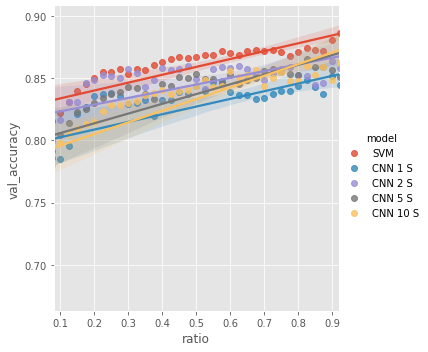

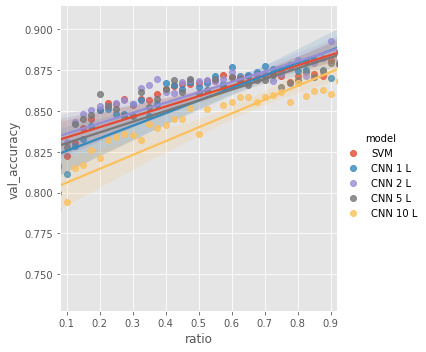

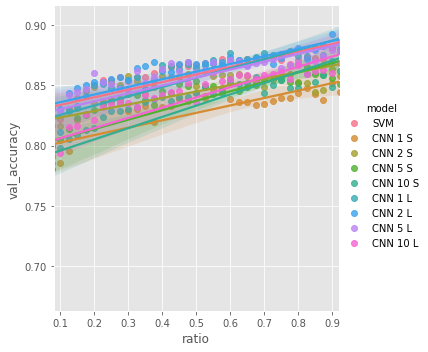

In [25]:
plot_3a(pd.concat((
    results_3a_svm,
    select_size(results_3a_cnn, 'S')
)))
plot_3a(pd.concat((
    results_3a_svm,
    select_size(results_3a_cnn, 'L')
)))
plot_3a(pd.concat((
    results_3a_svm,
    results_3a_cnn,
)))

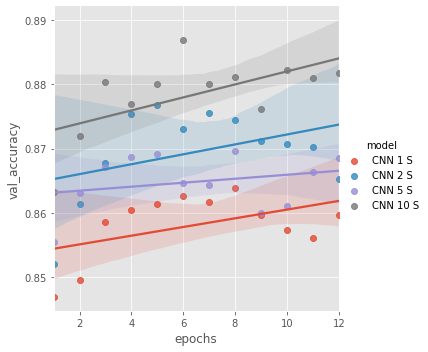

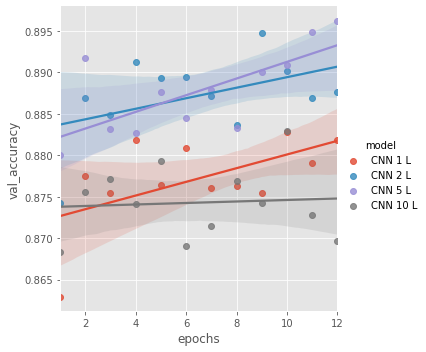

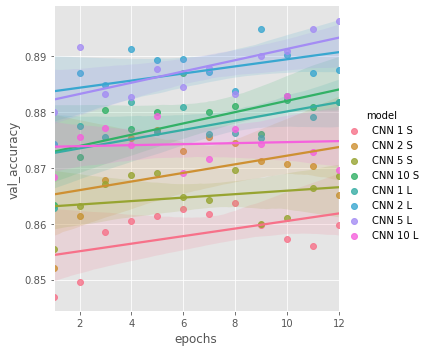

In [26]:
plot_3b(select_size(results_3b_cnn, 'S'))
plot_3b(select_size(results_3b_cnn, 'L'))
plot_3b(results_3b_cnn)